<a href="https://colab.research.google.com/github/atharv1813/colab_tuts/blob/main/Keras_model_subclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Building Models in TensorFlow: Three Approaches

When working with TensorFlow and Keras, you have three main ways to define models: **Sequential API**, **Functional API**, and **Model Subclassing**. Each approach provides different levels of flexibility and complexity.

---

## 1. `keras.Sequential()`

The `keras.Sequential()` API is the simplest way to build a model in Keras. It is used to create a **single-input, single-output** stack of layers, where each layer has only one input tensor and one output tensor.

### When to Use
- Use when you are building a straightforward, linear model, where the layers are stacked in sequence.
- Best suited for feedforward neural networks without any complex topologies, such as branching or multiple inputs.

### Example
```python
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(100,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()
```

### Limitations
- Cannot handle complex architectures, such as models with multiple inputs or outputs.
- Cannot create models that have shared layers or non-linear data flows.

---

## 2. **Functional API**

The **Functional API** is a more flexible way to build models. It allows you to create models that are simple or complex, with branching, merging, and shared layers.

### When to Use
- When your model needs to have more complex architectures than a simple sequential stack.
- Ideal for **multi-input** and **multi-output** models.
- Useful for **residual networks**, **shared layers**, **partial models**, and **transfer learning**.

### Key Functional API Use Cases
1. **Simple Sequential Model**
   - Can replicate the behavior of `keras.Sequential()`.
   ```python
   inputs = keras.Input(shape=(100,))
   x = layers.Dense(64, activation='relu')(inputs)
   x = layers.Dense(32, activation='relu')(x)
   outputs = layers.Dense(1, activation='sigmoid')(x)
   model = keras.Model(inputs=inputs, outputs=outputs)
   ```

2. **Branched Layers Model**
   - Allows for layers to branch off and be merged later in the network.
   ```python
   input_tensor = keras.Input(shape=(128,))
   x = layers.Dense(64, activation='relu')(input_tensor)
   branch1 = layers.Dense(32, activation='relu')(x)
   branch2 = layers.Dense(32, activation='relu')(x)
   merged = layers.concatenate([branch1, branch2])
   output_tensor = layers.Dense(1)(merged)
   model = keras.Model(inputs=input_tensor, outputs=output_tensor)
   ```

3. **Residual Networks**
   - Useful for implementing skip connections like in ResNet.
   ```python
   inputs = keras.Input(shape=(64,))
   x = layers.Dense(64, activation='relu')(inputs)
   x = layers.Dense(64, activation='relu')(x)
   x = layers.add([x, inputs])  # Skip connection
   outputs = layers.Dense(10, activation='softmax')(x)
   model = keras.Model(inputs=inputs, outputs=outputs)
   ```

4. **Multi-Input Model**
   - Models that take more than one input.
   ```python
   input_a = keras.Input(shape=(32,))
   input_b = keras.Input(shape=(64,))
   x = layers.Dense(64, activation='relu')(input_a)
   y = layers.Dense(64, activation='relu')(input_b)
   combined = layers.concatenate([x, y])
   output = layers.Dense(1, activation='sigmoid')(combined)
   model = keras.Model(inputs=[input_a, input_b], outputs=output)
   ```

5. **Multi-Output Model**
   - Models that produce multiple outputs.
   ```python
   inputs = keras.Input(shape=(64,))
   x = layers.Dense(64, activation='relu')(inputs)
   output_1 = layers.Dense(1, activation='sigmoid', name='output_1')(x)
   output_2 = layers.Dense(10, activation='softmax', name='output_2')(x)
   model = keras.Model(inputs=inputs, outputs=[output_1, output_2])
   ```

6. **Partial Model and Transfer Learning**
   - Allows extracting features from one model and using them in another.
   ```python
   base_model = keras.applications.VGG16(weights='imagenet', include_top=False)
   base_model.trainable = False
   inputs = keras.Input(shape=(224, 224, 3))
   x = base_model(inputs, training=False)
   x = layers.Flatten()(x)
   outputs = layers.Dense(10, activation='softmax')(x)
   model = keras.Model(inputs, outputs)
   ```

---

## 3. **Model Subclassing**

Model subclassing provides the most flexibility and allows you to fully customize the model’s architecture. You subclass `keras.Model` and define your model layers and the forward pass in the `call` method.

### When to Use
- When you need complete control over the model’s behavior.
- Useful for research experiments, dynamic models, or models that require custom behaviors.

### Example
```python
from tensorflow import keras
from tensorflow.keras import layers

class MyModel(keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.dense1 = layers.Dense(64, activation='relu')
        self.dense2 = layers.Dense(32, activation='relu')
        self.output_layer = layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.output_layer(x)

model = MyModel()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
```

### Advantages
- Complete flexibility to create models with custom architectures.
- Supports dynamic computations and custom training logic.

### Drawbacks
- More complex and requires a deeper understanding of Keras and TensorFlow.
- Increased risk of errors due to the custom nature of implementation.

---

### Summary
- **`keras.Sequential()`**: Best for simple, linear stack models.
- **Functional API**: Ideal for more complex architectures, such as multi-input/multi-output, residuals, and shared layers.
- **Model Subclassing**: Provides the most flexibility and is suitable for research and custom implementations.

---



Here's a deeper and simpler explanation of **Keras Subclassing**:

---

# Keras Model Subclassing

Keras Model Subclassing is a powerful and flexible way to create custom models. It provides the most control over how you build and define your model, compared to the Sequential and Functional APIs.

Instead of just stacking layers or connecting them like in the other APIs, subclassing allows you to fully customize your model's behavior.

---

### What is Model Subclassing?

When using model subclassing, you create your own class that inherits from `keras.Model`. In this class, you define the model's architecture (layers) and specify the forward pass (how the data flows through the model) in a special method called `call`.

### How it Works

1. **Inherit from `keras.Model`**: You create a new class that extends `keras.Model`.
2. **Initialize Layers in `__init__()`**: Define the model's layers as instance variables in the `__init__()` method.
3. **Define Forward Pass in `call()`**: Implement how the data flows through your layers in the `call()` method.

### Why Use Model Subclassing?

- **Full Customization**: You can define complex architectures, implement conditional behavior, and even loop over layers dynamically if needed.
- **Dynamic Models**: Model subclassing is useful when the model needs to change dynamically during training or when experimenting with new ideas.
- **Custom Training Logic**: Allows you to write your own custom training loop, if necessary.

---

### Simple Example of Model Subclassing

Here’s a step-by-step example to understand model subclassing:

```python
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Step 1: Create a class that inherits from keras.Model
class MyModel(keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()  # Initialize the parent class
        # Define the layers you want to use
        self.dense1 = layers.Dense(64, activation='relu')
        self.dense2 = layers.Dense(32, activation='relu')
        self.output_layer = layers.Dense(1, activation='sigmoid')

    # Step 2: Define the forward pass in the call() method
    def call(self, inputs):
        x = self.dense1(inputs)  # Pass inputs through the first layer
        x = self.dense2(x)       # Pass through the second layer
        return self.output_layer(x)  # Pass through the output layer

# Step 3: Create an instance of the model and compile it
model = MyModel()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Now you can use the model like any other Keras model
```

---

### Breakdown of the Example

1. **Class Definition**:
   - `class MyModel(keras.Model)`: This creates a custom model class named `MyModel` that inherits from `keras.Model`.

2. **Initialization (`__init__` Method)**:
   - `super(MyModel, self).__init__()`: This calls the parent class's initializer.
   - `self.dense1`, `self.dense2`, `self.output_layer`: Here, you define the layers you want to use. These layers will be used in the `call()` method.

3. **Forward Pass (`call` Method)**:
   - This method defines how data moves through the model, from input to output.
   - You use `self.dense1`, `self.dense2`, and `self.output_layer` to process the input data step-by-step.

### Advantages of Model Subclassing

1. **Flexibility**: You can implement any custom behavior in the `call()` method, including loops, conditionals, or even recurrent operations.
2. **Custom Training Logic**: It makes it easier to override methods like `train_step()` for a custom training routine.
3. **Dynamic Architectures**: Useful for models that have different behavior for each forward pass or architectures that change during training.

---

### Use Cases for Model Subclassing

1. **Research and Prototyping**: When you’re experimenting with novel architectures or training procedures.
2. **Complex Models**: Such as those involving conditional operations, recursive loops, or models that require runtime flexibility.
3. **Custom Loss Functions and Training**: When your model has to work with custom loss functions or requires a specific training loop.

---

### Limitations of Model Subclassing

- **Less Automatic**: You have to handle more of the model's behavior manually.
- **No Model Summary**: The Keras model summary may not display all the details of your model's layers, especially if they are conditionally created.
- **More Error-Prone**: Since you have more control, there’s also more room for mistakes compared to the simpler Sequential or Functional APIs.

---

Model Subclassing gives you the freedom to innovate but requires a deeper understanding of how Keras and TensorFlow work under the hood. It's a great choice for building state-of-the-art models or for tasks that the simpler APIs cannot handle.

In [ ]:
# https://www.youtube.com/watch?v=r9q5aYgLpjk
# First see this video

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Step 1: Create a class that inherits from keras.Model
class MyModel(keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()  # Initialize the parent class
        # Define the layers you want to use
        self.dense1 = layers.Dense(64, activation='relu')
        self.dense2 = layers.Dense(32, activation='relu')
        self.output_layer = layers.Dense(1, activation='sigmoid')

    # Step 2: Define the forward pass in the call() method
    def call(self, inputs):
        x = self.dense1(inputs)  # Pass inputs through the first layer
        x = self.dense2(x)       # Pass through the second layer
        return self.output_layer(x)  # Pass through the output layer

# Step 3: Create an instance of the model and compile it
model = MyModel()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())


# Now you can use the model like any other Keras model


Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# USE CASE OF KERAS SUBCLASSING

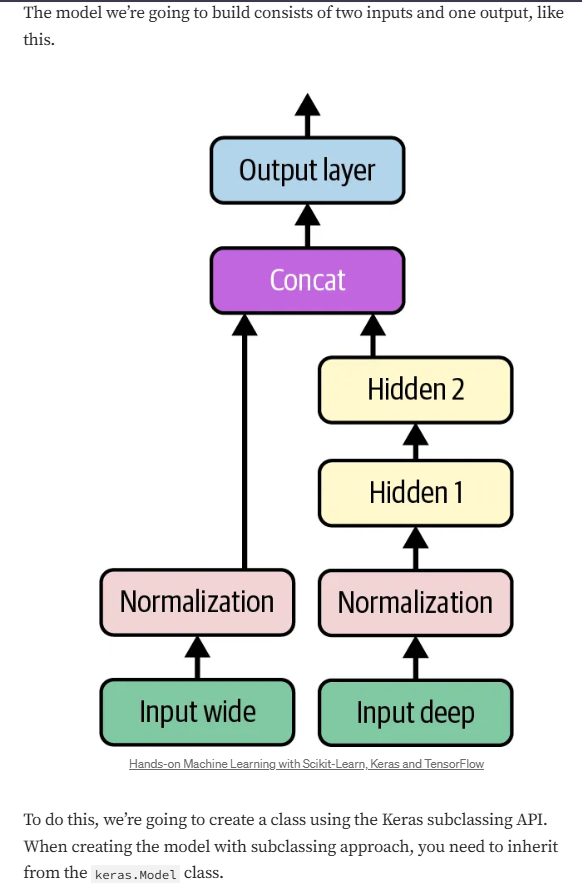

### Problem Addressed by Wide and Deep Learning

The **Wide and Deep Learning** approach is designed to combine the benefits of *memorization* and *generalization*.

1. **Memorization** refers to learning direct associations from historical data. For example, if you’re designing a recommendation system, you might want your model to memorize that a user who has purchased a specific product is highly likely to buy a related product. This is achieved through a *wide* (shallow) model.
2. **Generalization** refers to the ability of the model to make predictions on unseen data. This is typically done using a *deep* neural network, which can learn complex patterns and relationships within the data.

By combining these two approaches, Wide and Deep Learning models aim to:
- Handle **feature-rich data** by capturing both simple rules and complex patterns.
- Improve performance on tasks like click-through rate (CTR) prediction, recommendation systems, and regression problems.

---

### Why Keras Subclassing Is Needed for Wide and Deep Learning

While the **Sequential API** and the **Functional API** are convenient and powerful, they have limitations that make them less suitable for implementing certain types of complex models, like Wide and Deep Learning models. Here's why subclassing is essential:

1. **Limitations of Keras Sequential API**:
   - The **Sequential API** only allows for a **linear stack of layers**. You cannot create models with branching, shared layers, or multiple inputs and outputs using this API.
   - It’s not flexible enough for architectures where layers are combined or reused in non-sequential ways, like concatenating inputs or implementing residual connections.

2. **Limitations of Keras Functional API**:
   - The **Functional API** is more flexible and allows for **multi-input and multi-output models**, **branching**, and **shared layers**. However, it still assumes a relatively static and well-defined computation graph.
   - Complex architectures, such as those that require **custom logic** in the forward pass (e.g., dynamic control flows, iterative loops, or conditional layers), are difficult to express using the Functional API.

---

### Specific Needs for Keras Subclassing API

The **Keras Subclassing API** addresses these limitations by providing the flexibility needed for:
1. **Dynamic Control Flows**:
   - In the subclassing approach, the forward pass is defined in the `call()` method. This allows you to use dynamic behavior, such as `if` statements, loops, and other control structures, which are not easily achievable with the Sequential or Functional APIs.
   - This is essential for models that need to adjust their behavior during the forward pass, such as implementing complex architectures like Wide and Deep Learning, recurrent networks with conditional behavior, or models that require custom data preprocessing layers.

2. **Custom Layer and Model Definitions**:
   - You can define completely **custom models and layers** with unique forward pass logic. For example, the Wide and Deep Learning model requires normalizing different inputs separately, passing one through a series of dense layers, and concatenating outputs from multiple paths. The subclassing approach provides the flexibility to implement this easily.
   - The ability to use multiple inputs, apply custom transformations, and design models with different architectures, all in a single class, is a strong advantage of the subclassing API.

3. **More Fine-Grained Control**:
   - With subclassing, you have **fine-grained control** over every aspect of the model's behavior, from how data is passed through each layer to how the final output is generated.
   - This is critical for tasks where standard models don’t work well, and you need to adjust how features are processed, such as Wide and Deep Learning.

---

### Example: Wide and Deep Learning with Keras Subclassing

The Wide and Deep Learning model you described involves:
- Processing **wide inputs** through a normalization layer (memorization).
- Passing **deep inputs** through a deep neural network (generalization).
- **Concatenating** the outputs and making a final prediction.

This architecture:
- Involves **multiple inputs** and different processing paths for those inputs.
- Requires **concatenation** of outputs, which is complex and cannot be easily implemented with the Sequential API.
- Needs the flexibility to define custom data flow, making subclassing the best approach.

### Key Advantages of Keras Subclassing for Wide and Deep Learning:
- **Custom and dynamic data flow**: You can define any data processing logic in the `call()` method.
- **Ease of handling multiple inputs and outputs**: You have full control over how inputs are processed and combined.
- **Custom preprocessing and postprocessing**: You can implement normalization or feature engineering directly within the model.

In summary, the **Keras Subclassing API** is necessary for Wide and Deep Learning models because it allows for the custom architecture and dynamic behavior that the Sequential and Functional APIs cannot efficiently handle.

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow import keras



class My_Model(tf.keras.Model):                                        #(1)
  def __init__(self, units=30, activation="relu"):                     #(2)
    super().__init__()                                                 #(3)
    self.norm_layer_wide = tf.keras.layers.Normalization()             #(4)
    self.norm_layer_deep = tf.keras.layers.Normalization()             #(4)
    self.hidden1 = tf.keras.layers.Dense(units, activation=activation) #(5)
    self.hidden2 = tf.keras.layers.Dense(units, activation=activation) #(5)
    self.main_output = tf.keras.layers.Dense(1)                        #(6)
  def call(self, inputs):                                              #(7)
    input_wide, input_deep = inputs                                    #(7)
    norm_wide = self.norm_layer_wide(input_wide)                       #(8)
    norm_deep = self.norm_layer_deep(input_deep)                       #(8)
    hidden1 = self.hidden1(norm_deep)                                  #(9)
    hidden2 = self.hidden2(hidden1)                                    #(9)
    concat = tf.keras.layers.concatenate([norm_wide, hidden2])         #(10)
    output = self.main_output(concat)                                  #(11)
    return output                                                      #(12)

## Step-by-Step Explanation of the My_Model Class

1. **Class Definition**:
   - We defined a class called `My_Model`. This class inherits from `tf.keras.Model`, which is the base class for all Keras models.

2. **Constructor Initialization**:
   - We used the `__init__` function to create an instance of this class. We know from object-oriented programming that the first parameter of the `__init__` function is `self`. This constructor takes two optional arguments: `units` and `activation`.

3. **Superclass Initialization**:
   - We used the `super` keyword. This allows us to use all the variables and methods of a superclass inside another class. In other words, we can specify our own attributes while using the attributes of the superclass with this keyword.

4. **Normalization Layers**:
   - We created two instances of `tf.keras.layers.Normalization()`, which are used to normalize the two input branches separately.

5. **Dense Layers**:
   - We defined two instances of `tf.keras.layers.Dense()`, which are fully connected (dense) layers with `units` number of neurons and `activation` as the activation function.

6. **Output Layer**:
   - We created the output layer, which is another dense layer with one output neuron. This layer will output a single scalar value.

7. **Forward Pass**:
   - We defined the `call()` method, which is called during the forward pass of the model. This method takes the input as an argument, which is a tuple of two tensors representing the wide and deep input branches.

8. **Normalization Application**:
   - We applied the normalization layers to the two input branches separately.

9. **Hidden Layers Processing**:
   - We passed the two hidden layers to the normalized deep input branch.

10. **Concatenation**:
    - We concatenated the normalized wide input branch with the output of the second hidden layer.

11. **Final Output**:
    - We applied the output layer to the concatenated tensor to produce the final output.

12. **Return Statement**:
    - We returned the output of the model.


In [ ]:
tf.random.set_seed(42)

model = My_Model(30, activation= "relu")

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(
              loss="mse",
              optimizer=optimizer,
              metrics=["RootMeanSquaredError"]
)

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]

model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)

history = model.fit((X_train_wide, X_train_deep),
                     y_train,
                     validation_split=0.1,
                     epochs=10)

Epoch 1/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 1.5723 - loss: 2.5772 - val_RootMeanSquaredError: 0.7778 - val_loss: 0.6050
Epoch 2/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7299 - loss: 0.5331 - val_RootMeanSquaredError: 0.6963 - val_loss: 0.4849
Epoch 3/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6646 - loss: 0.4417 - val_RootMeanSquaredError: 0.6729 - val_loss: 0.4528
Epoch 4/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6420 - loss: 0.4123 - val_RootMeanSquaredError: 0.6577 - val_loss: 0.4326
Epoch 5/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6297 - loss: 0.3966 - val_RootMeanSquaredError: 0.6481 - val_loss: 0.4200
Epoch 6/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.6206 - loss: 0.3853 - val_RootMeanSquaredError: 0.6413 - val_loss: 0.4112
Epoch 7/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.6160 - los

In [ ]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
eval_results


162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6016 - loss: 0.3620


[0.35572412610054016, 0.5964261293411255]

In [ ]:
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

y_pred = model.predict((X_new_wide, X_new_deep))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


array([[0.45676067],
       [1.6427989 ],
       [3.3180678 ]], dtype=float32)

In [ ]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

**3 WAYS TO BUILD TENSORFLOW MODELS**

1. ***Sequential***







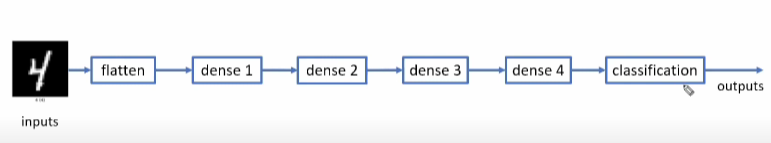

In [ ]:
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense, Flatten, Concatenate
import tensorflow as tf
import keras

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
type(train_X)

numpy.ndarray

In [ ]:
print('train_x: ' + str(train_X.shape))
print('train_y ' + str(train_y.shape))
print('test_X ' + str(test_X.shape))
print('test_y ' + str(test_y.shape))

train_x: (60000, 28, 28)
train_y (60000,)
test_X (10000, 28, 28)
test_y (10000,)


In [ ]:
train_y_ohe = np.zeros((train_y.size, 10))
train_y_ohe[np.arange(train_y.size), train_y] = 1

test_y_ohe = np.zeros((test_y.size, 10))
test_y_ohe[np.arange(test_y.size), test_y] = 1

In [ ]:
simple_sequential_model = keras.Sequential()
simple_sequential_model.add(Flatten(input_shape=(28, 28), name='flatten1'))
simple_sequential_model.add(Dense(512, activation='relu', name='dense_1'))
simple_sequential_model.add(Dense(512, activation='relu', name='dense_2'))
simple_sequential_model.add(Dense(512, activation='relu', name='dense_3'))
simple_sequential_model.add(Dense(512, activation='relu', name='dense_4'))
simple_sequential_model.add(Dense(10, activation='softmax', name='classification'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
simple_sequential_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten1 (Flatten)                   │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classification (Dense)               │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,195,018 (4.56 MB)

 Trainable params: 1,195,018 (4.56 MB)

 Non-trainable params: 0 (0.00 B)

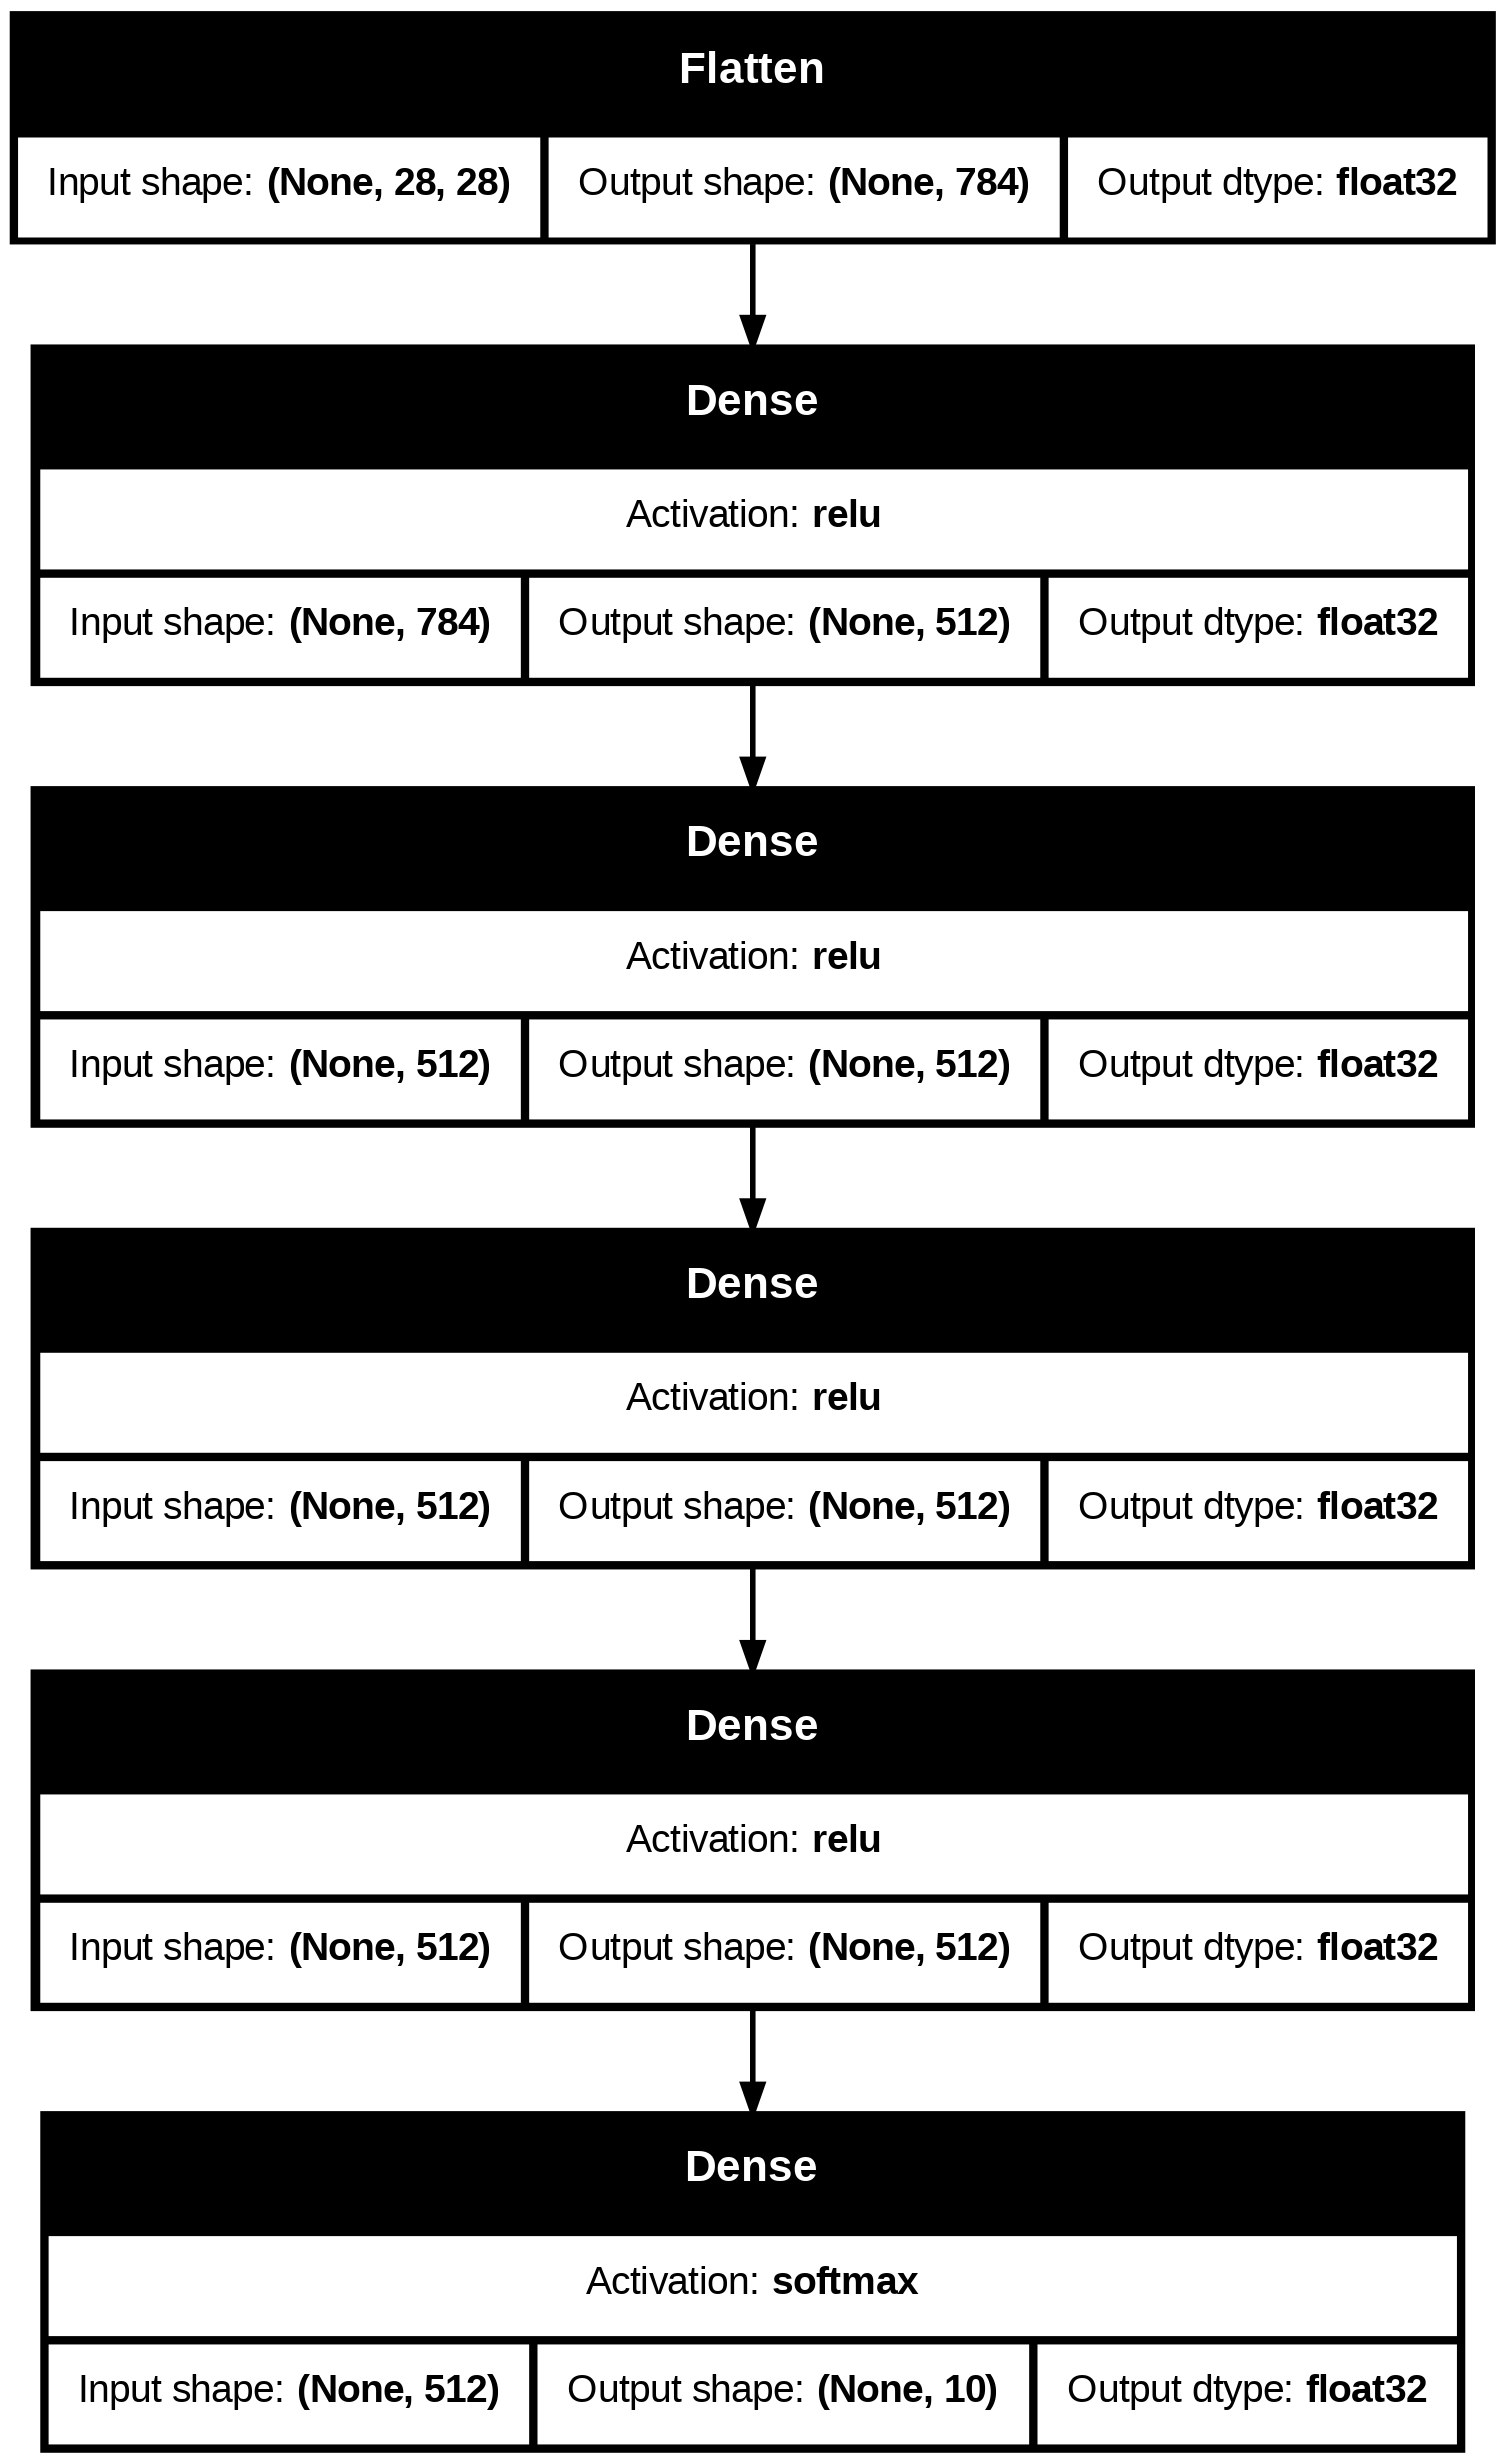

In [ ]:
keras.utils.plot_model(
                        simple_sequential_model,
                        show_shapes=True,
                        show_dtype=True,
                        show_layer_activations=True
)

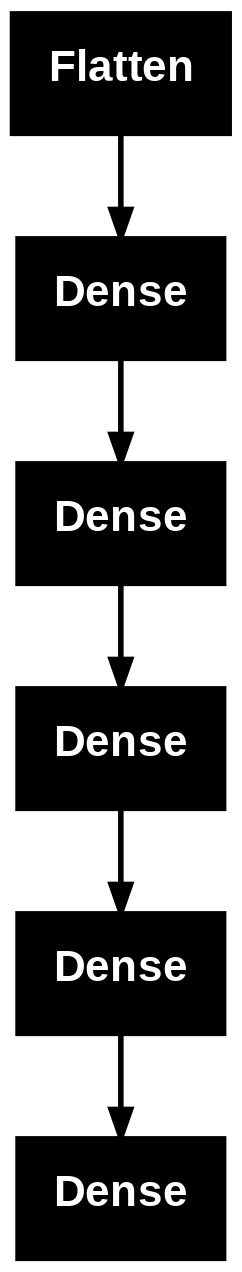

In [ ]:
keras.utils.plot_model(
                        simple_sequential_model,
)

In [ ]:
%%time
simple_sequential_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
simple_sequential_model.fit(train_X, train_y_ohe, validation_data=(test_X, test_y_ohe), epochs=3, batch_size=128)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.8182 - loss: 4.8783 - val_accuracy: 0.9446 - val_loss: 0.1955
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9580 - loss: 0.1398 - val_accuracy: 0.9598 - val_loss: 0.1430
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.9697 - loss: 0.0976 - val_accuracy: 0.9590 - val_loss: 0.1571
CPU times: user 1min 9s, sys: 3.11 s, total: 1min 13s
Wall time: 1min


In [ ]:
simple_sequential_model.predict(test_X)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[3.49519252e-15, 2.68446273e-14, 1.68190708e-14, ...,
        9.99999940e-01, 3.03925461e-11, 1.11580775e-12],
       [1.42903649e-11, 9.89696236e-09, 9.99999940e-01, ...,
        1.10300505e-10, 8.40919626e-11, 2.56010707e-13],
       [9.31226580e-08, 9.99980867e-01, 3.53226142e-07, ...,
        1.18979351e-05, 4.78187394e-06, 1.54244660e-07],
       ...,
       [2.07709739e-12, 1.77616657e-10, 5.17143143e-12, ...,
        1.25030866e-07, 5.83607163e-09, 2.00522393e-07],
       [9.03301184e-11, 2.15488384e-14, 2.21584274e-12, ...,
        2.30017638e-13, 3.08958414e-11, 1.00902544e-12],
       [1.96118295e-11, 4.44529599e-14, 6.40555942e-11, ...,
        3.02745424e-17, 1.09907942e-11, 4.33421169e-14]], dtype=float32)

1. ***Functional***


In [ ]:
inputs = keras.Input(shape=[28, 28], name='input')
x = Flatten(name='flatten')(inputs)
x = Dense(512, activation='relu', name = 'dense_1')(x)
x = Dense(512, activation='relu', name = 'dense_2')(x)
x = Dense(512, activation='relu', name = 'dense_3')(x)
x = Dense(512, activation='relu', name = 'dense_4')(x)
outputs = Dense(10, activation='softmax', name='classification')(x)

functional_api_model = keras.Model(inputs=inputs, outputs=outputs)
functional_api_model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classification (Dense)               │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,195,018 (4.56 MB)

 Trainable params: 1,195,018 (4.56 MB)

 Non-trainable params: 0 (0.00 B)

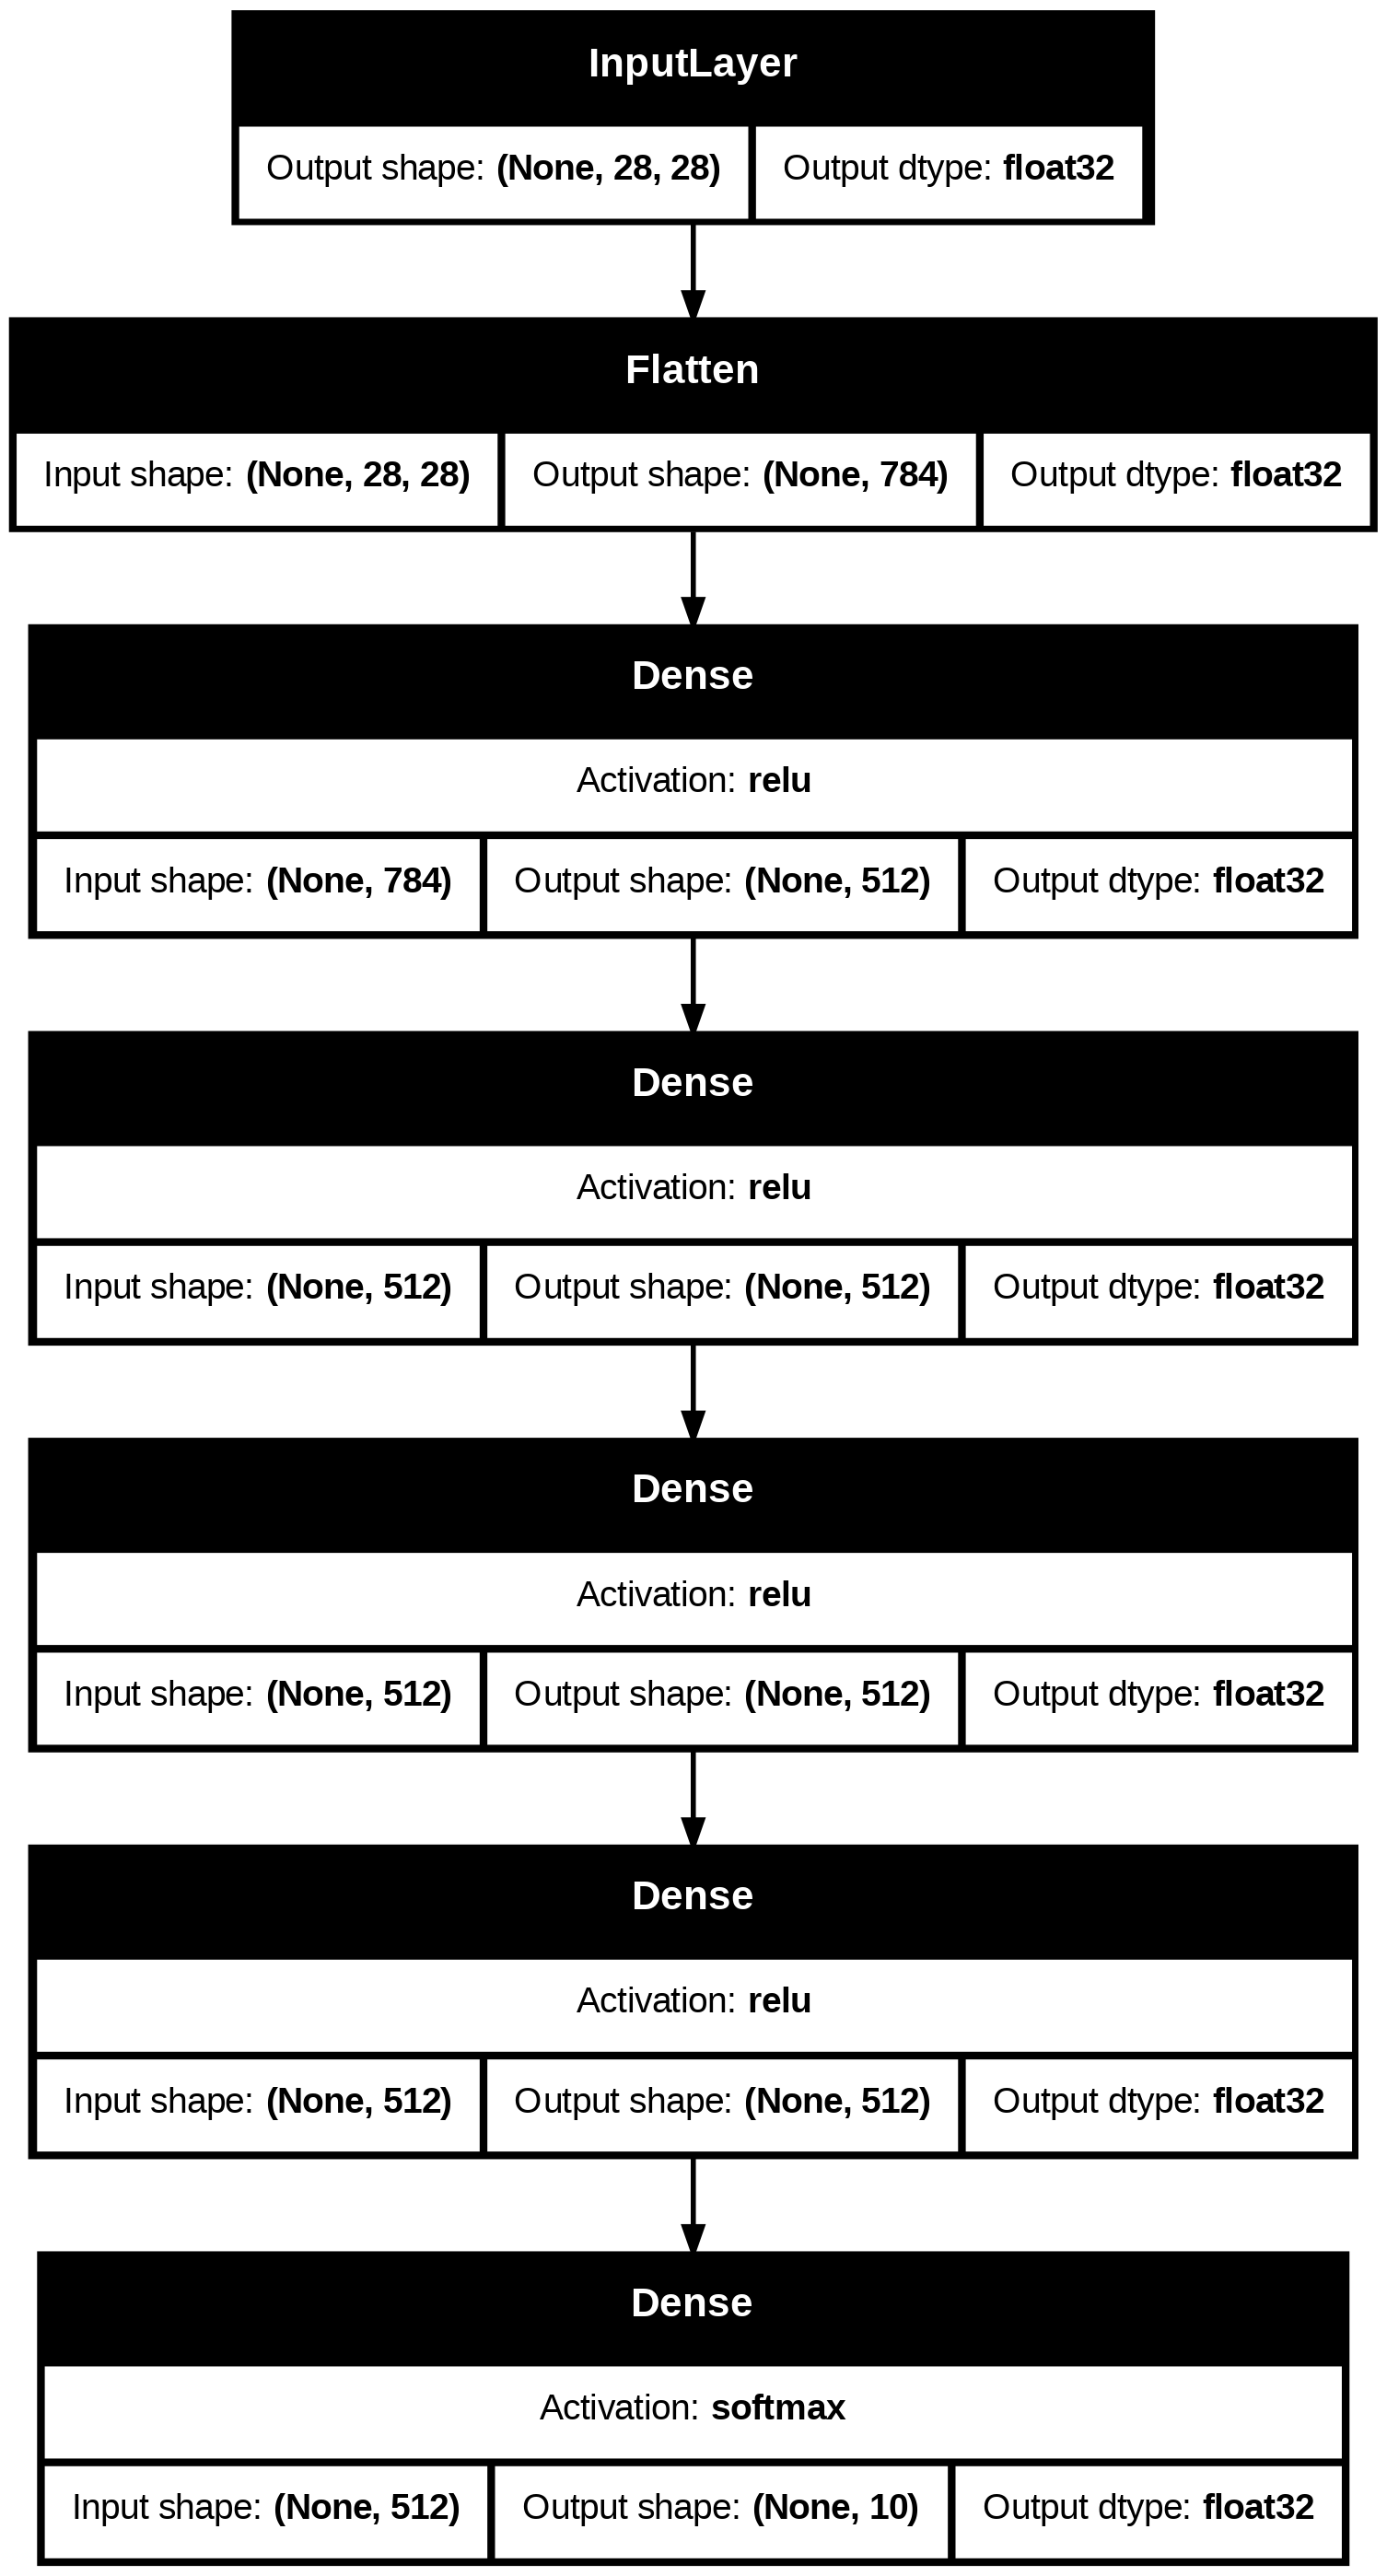

In [ ]:
keras.utils.plot_model(
                        functional_api_model,
                        show_shapes=True,
                        show_dtype=True,
                        show_layer_activations=True
)

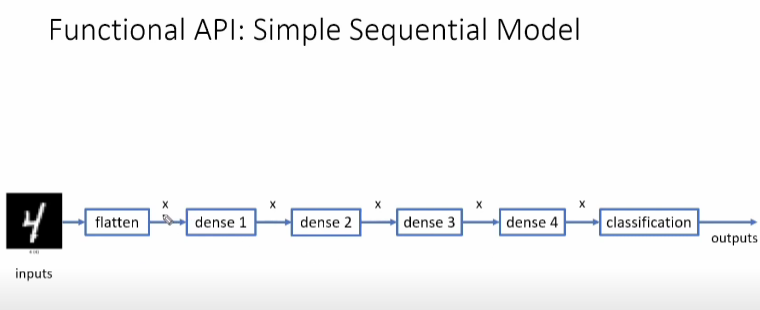

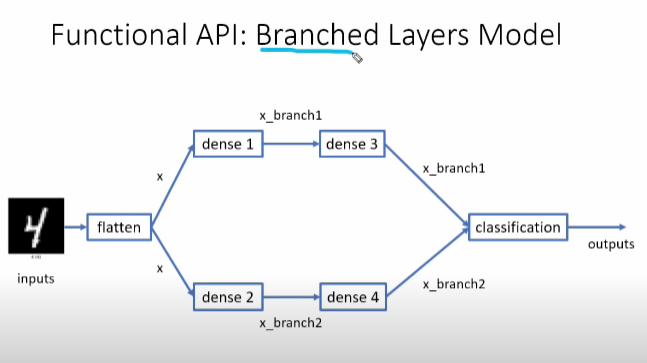

In [ ]:
inputs = keras.Input(shape=[28, 28], name='input')
x = Flatten(name='flatten')(inputs)
x_branch1 = Dense(512, activation='relu', name = 'dense_1')(x)
x_branch2 = Dense(512, activation='relu', name = 'dense_2')(x)
x_branch1 = Dense(512, activation='relu', name = 'dense_3')(x_branch1)
x_branch2 = Dense(512, activation='relu', name = 'dense_4')(x_branch2)
outputs = Dense(10, activation='softmax', name='classification')(x_branch1 + x_branch2)
# see outputs ko input me x_branch1 and x_branch2 mila hai
# we can add like this only if same shape ke hai

functional_api_branch_model = keras.Model(inputs=inputs, outputs=outputs)
functional_api_branch_model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)        │ (None, 28, 28)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 784)            │              0 │ input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 512)            │        401,920 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 512)            │        401,920 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 512)            │        262,656 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 512)            │        262,656 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 512)            │              0 │ dense_3[0][0],         │
│                           │                        │                │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ classification (Dense)    │ (None, 10)             │          5,130 │ add[0][0]              │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,334,282 (5.09 MB)

 Trainable params: 1,334,282 (5.09 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
keras.utils.plot_model(
                        functional_api_branch_model,
                        show_shapes=True,
                        show_dtype=True,
                        show_layer_activations=True
)

In [ ]:
inputs = keras.Input(shape=[28, 28], name='input')
x = Flatten(name='flatten')(inputs)
x_branch1 = Dense(512, activation='relu', name = 'dense_1')(x)
x_branch2 = Dense(512, activation='relu', name = 'dense_2')(x)
x_branch1 = Dense(512, activation='relu', name = 'dense_3')(x_branch1)
x_branch2 = Dense(512, activation='relu', name = 'dense_4')(x_branch2)
concat = Concatenate(axis=1, name='concat')([x_branch1, x_branch2])
outputs = Dense(10, activation='softmax', name='classification')(concat)

functional_api_branch_model = keras.Model(inputs=inputs, outputs=outputs)
functional_api_branch_model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)        │ (None, 28, 28)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 784)            │              0 │ input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 512)            │        401,920 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 512)            │        401,920 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 512)            │        262,656 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 512)            │        262,656 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concat (Concatenate)      │ (None, 1024)           │              0 │ dense_3[0][0],         │
│                           │                        │                │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ classification (Dense)    │ (None, 10)             │         10,250 │ concat[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,339,402 (5.11 MB)

 Trainable params: 1,339,402 (5.11 MB)

 Non-trainable params: 0 (0.00 B)

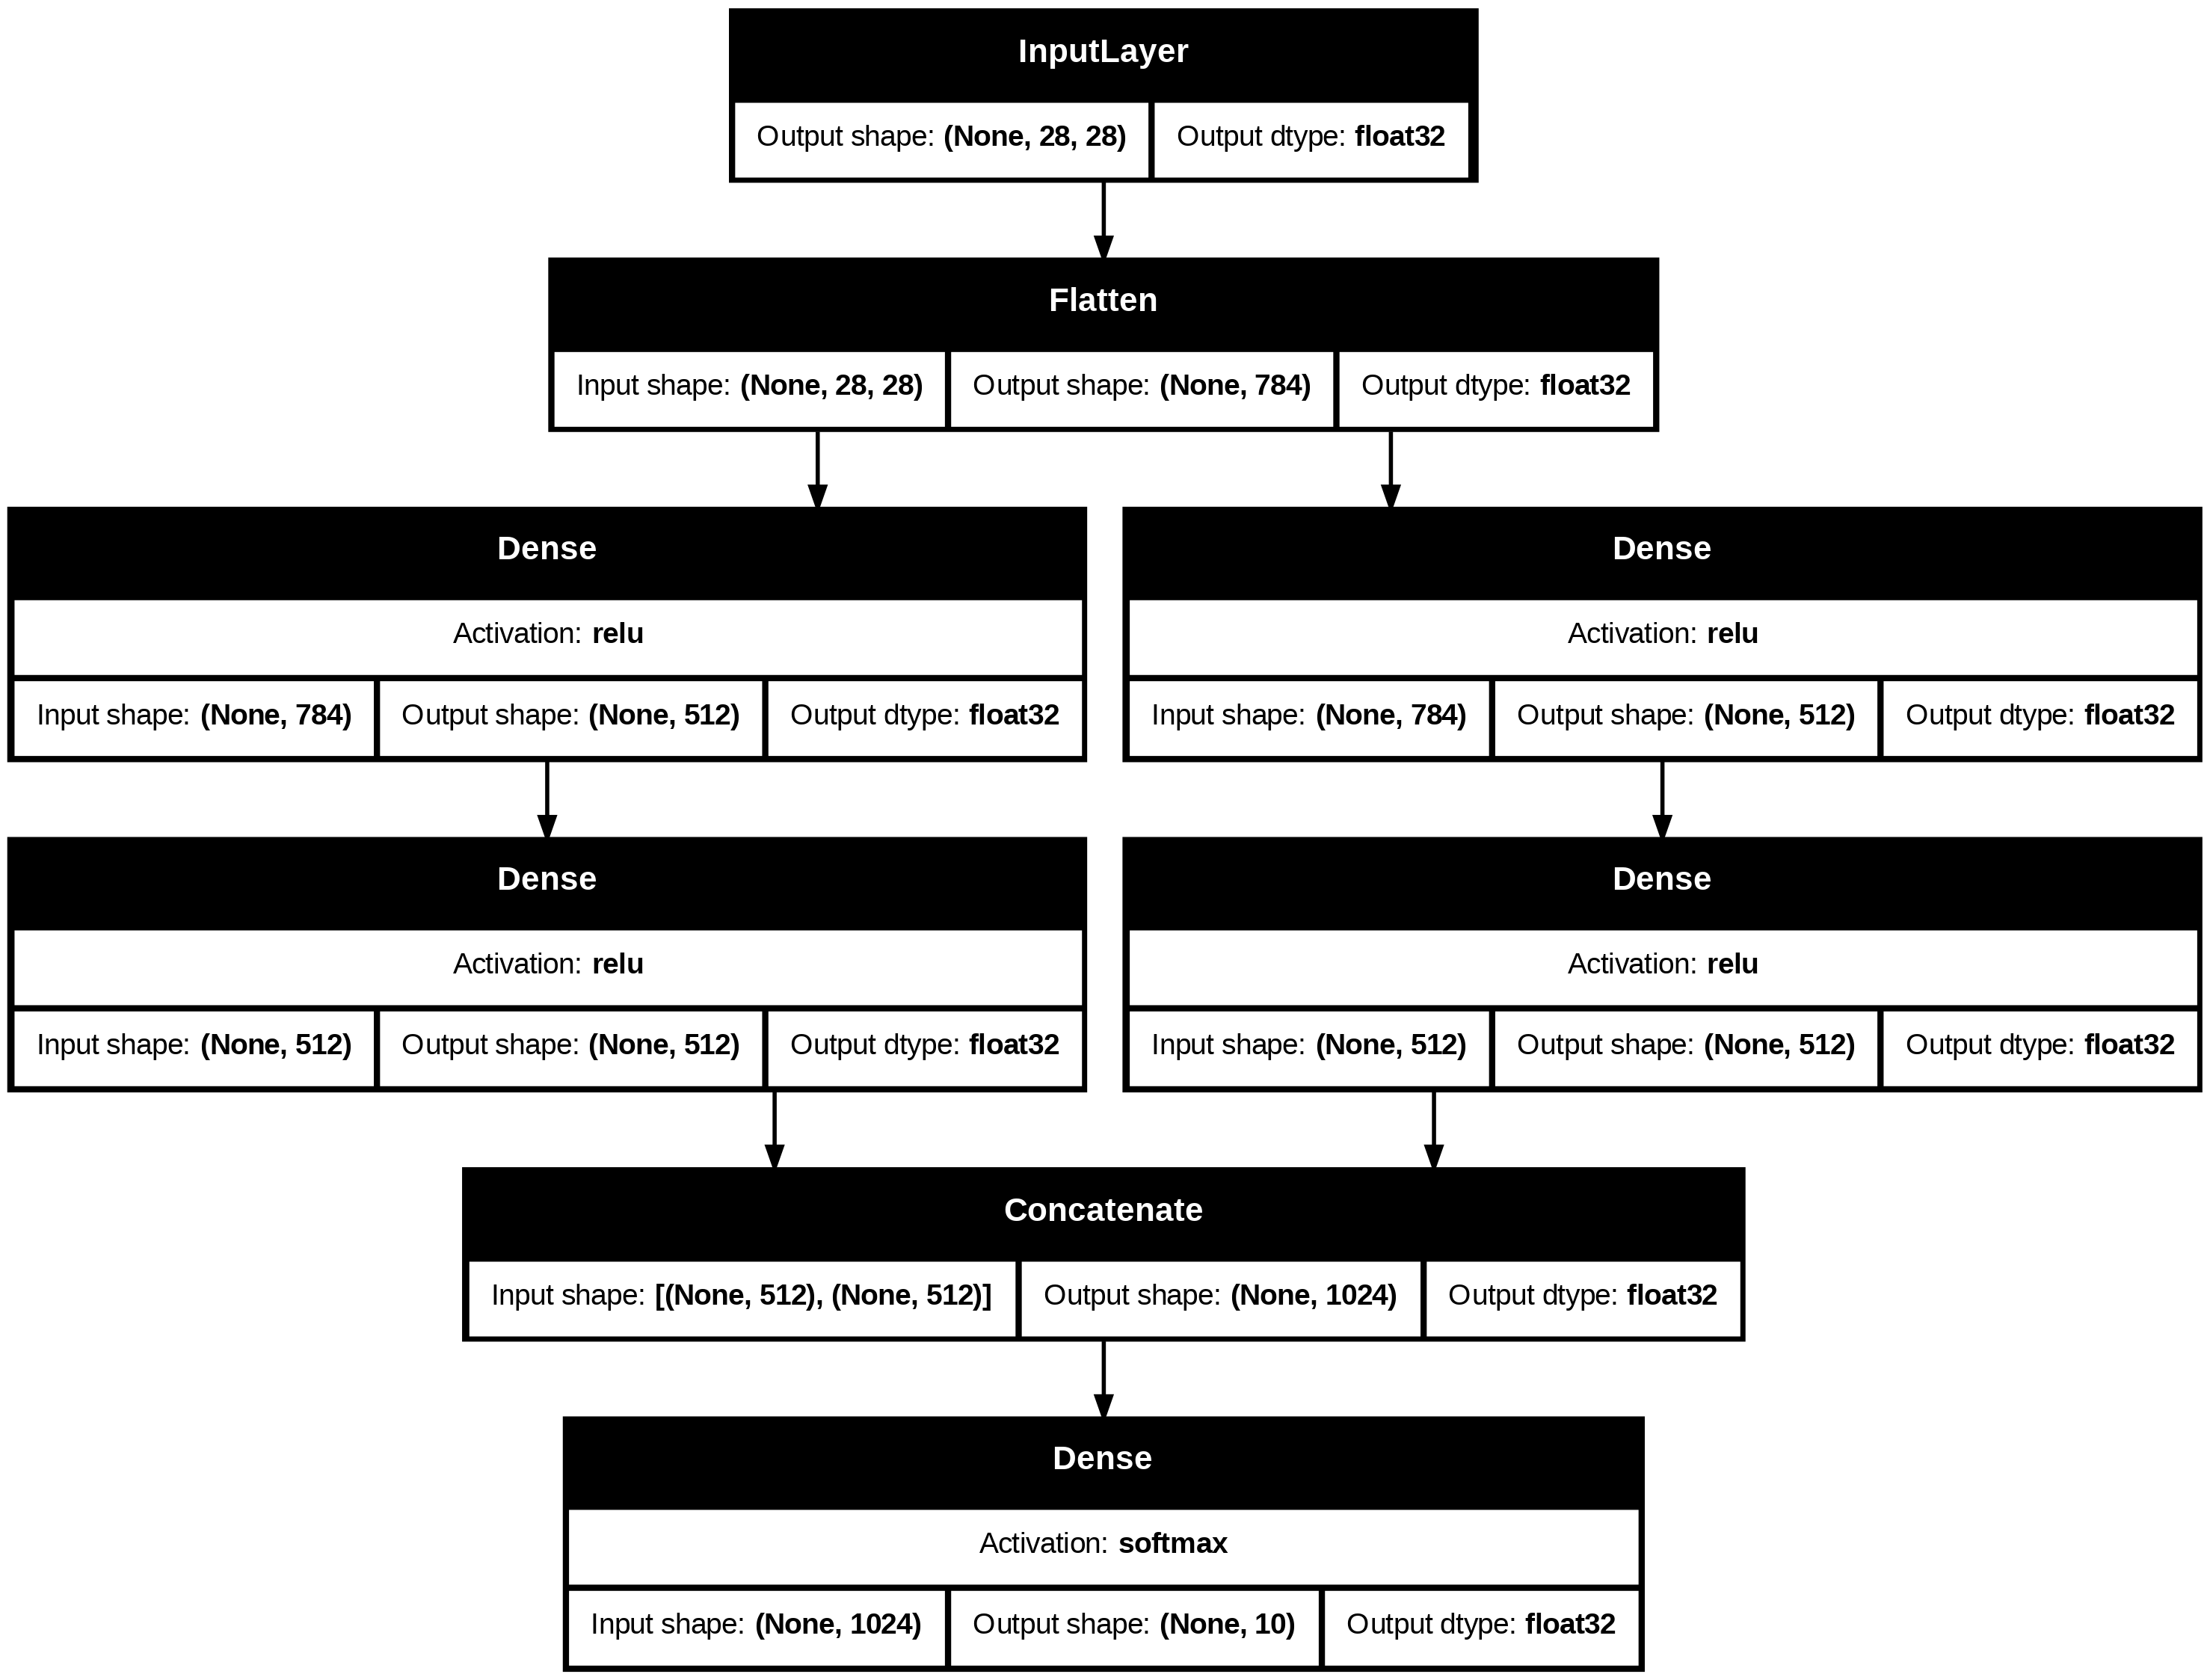

In [ ]:
keras.utils.plot_model(
                        functional_api_branch_model,
                        show_shapes=True,
                        show_dtype=True,
                        show_layer_activations=True
)

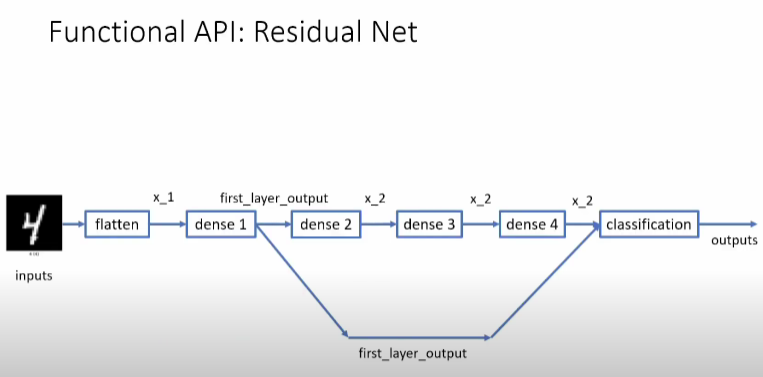

In [ ]:
inputs = keras.Input(shape=[28, 28], name='input')
x_1 = Flatten(name='flatten')(inputs)
first_layer_output = Dense(512, activation='relu', name = 'dense_1')(x_1)
x_2 = Dense(512, activation='relu', name = 'dense_2')(first_layer_output)
x_2 = Dense(512, activation='relu', name = 'dense_3')(x_2)
x_2 = Dense(512, activation='relu', name = 'dense_4')(x_2)
outputs = Dense(10, activation='softmax', name='classification')(x_2 + first_layer_output)
# see outputs ko input me x_branch1 and x_branch2 mila hai

functional_api_resnet_model = keras.Model(inputs=inputs, outputs=outputs)
functional_api_resnet_model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)        │ (None, 28, 28)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 784)            │              0 │ input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 512)            │        401,920 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 512)            │        262,656 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 512)            │        262,656 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 512)            │        262,656 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 512)            │              0 │ dense_4[0][0],         │
│                           │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ classification (Dense)    │ (None, 10)             │          5,130 │ add_2[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,195,018 (4.56 MB)

 Trainable params: 1,195,018 (4.56 MB)

 Non-trainable params: 0 (0.00 B)

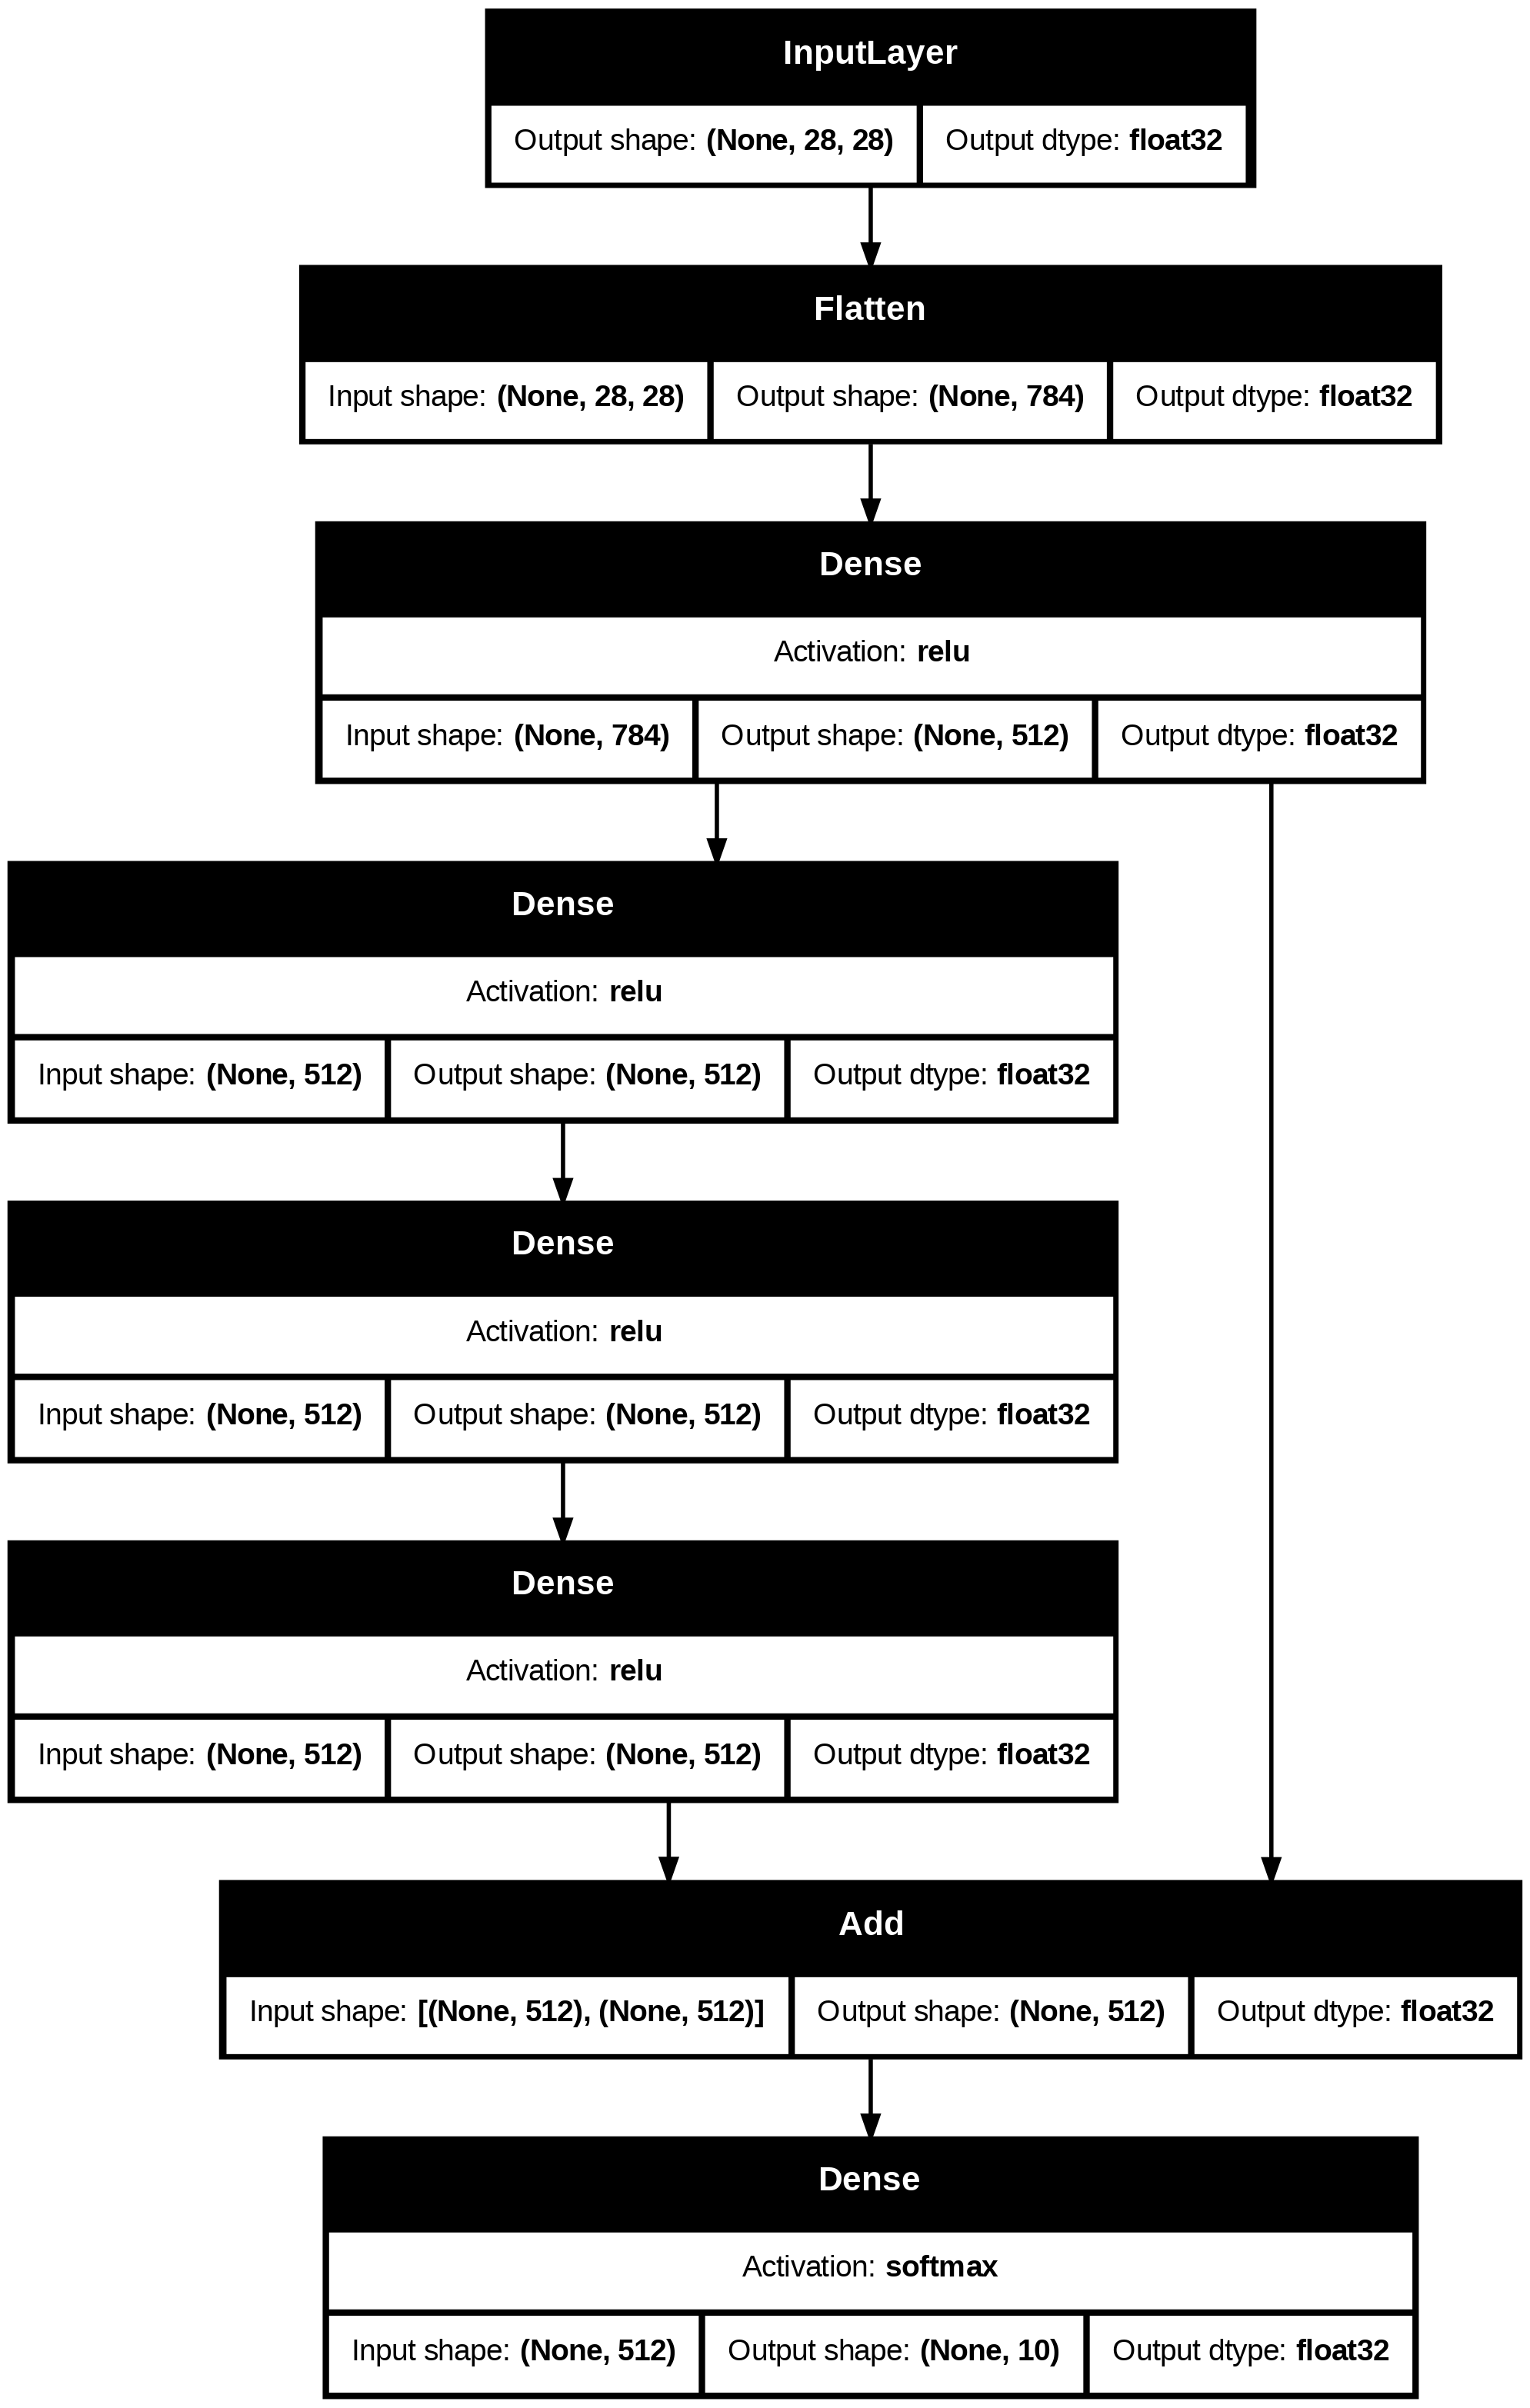

In [ ]:
keras.utils.plot_model(
                        functional_api_resnet_model,
                        show_shapes=True,
                        show_dtype=True,
                        show_layer_activations=True
)

In [ ]:
inputs = keras.Input(shape=[28, 28], name='input')
x_1 = Flatten(name='flatten')(inputs)
first_layer_output = Dense(512, activation='relu', name = 'dense_1')(x_1)
x_2 = Dense(512, activation='relu', name = 'dense_2')(first_layer_output)
x_2 = Dense(512, activation='relu', name = 'dense_3')(x_2)
x_2 = Dense(512, activation='relu', name = 'dense_4')(x_2)
concat = Concatenate(axis=1, name='concat')([x_2, first_layer_output])
outputs = Dense(10, activation='softmax', name='classification')(concat)
# see outputs ko input me x_branch1 and x_branch2 mila hai

functional_api_resnet_model = keras.Model(inputs=inputs, outputs=outputs)
functional_api_resnet_model.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)        │ (None, 28, 28)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 784)            │              0 │ input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 512)            │        401,920 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 512)            │        262,656 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 512)            │        262,656 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 512)            │        262,656 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concat (Concatenate)      │ (None, 1024)           │              0 │ dense_4[0][0],         │
│                           │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ classification (Dense)    │ (None, 10)             │         10,250 │ concat[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,200,138 (4.58 MB)

 Trainable params: 1,200,138 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

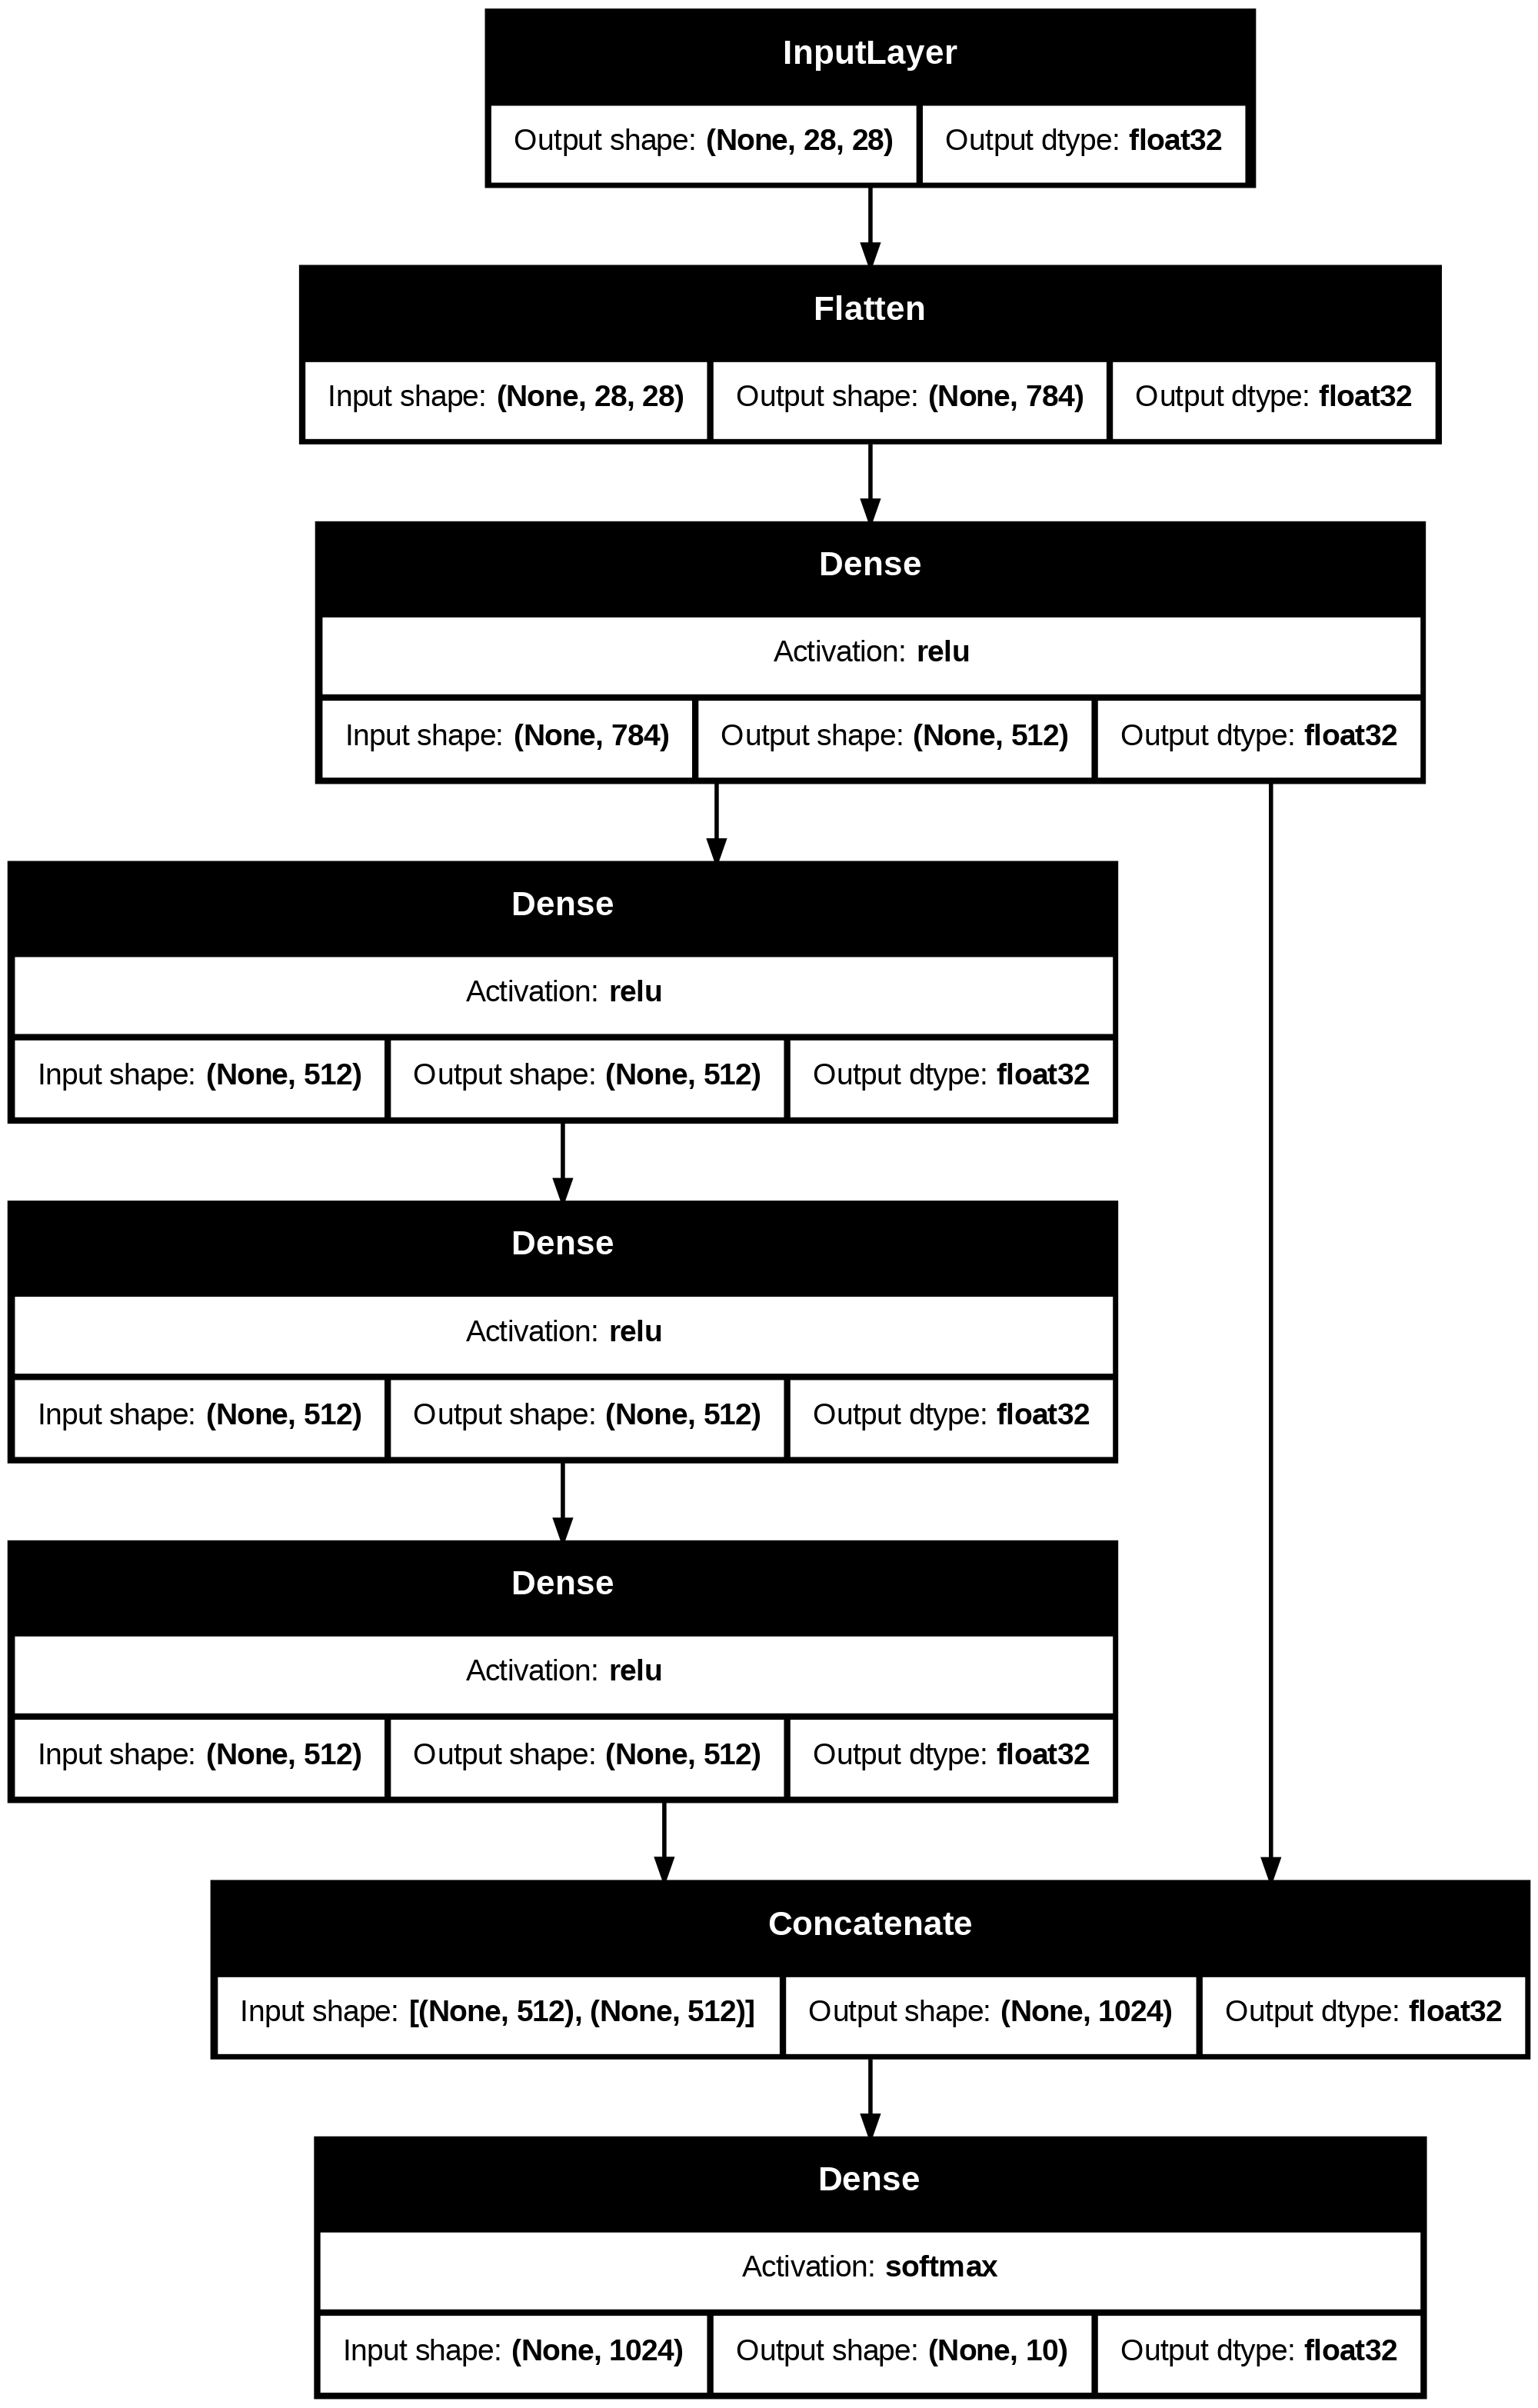

In [ ]:
keras.utils.plot_model(
                        functional_api_resnet_model,
                        show_shapes=True,
                        show_dtype=True,
                        show_layer_activations=True
)

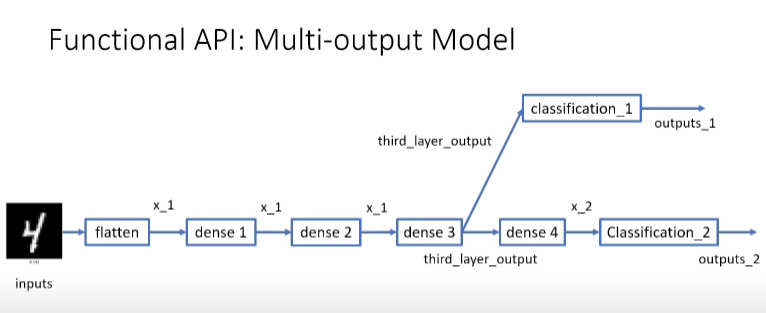

In [ ]:
inputs = keras.Input(shape=(28, 28), name = 'input')
x_1 = Flatten(name = 'flatten') (inputs)
x_1 = Dense(512, activation = 'relu', name = 'dense_1')(x_1)
x_1 = Dense(512, activation = 'relu', name = 'dense_2')(x_1)
third_layer_output = Dense(512, activation='relu', name='dense_3')(x_1)
outputs_1 = Dense(10, activation ='softmax', name = 'classification_1')(third_layer_output)
x_2 = Dense(512, activation = 'relu', name = 'dense_4')(third_layer_output)
outputs_2 = Dense(10, activation = 'softmax', name = 'classification_2')(x_2)

functional_api_multi_outputs_model = keras.Model(inputs = inputs, outputs = [outputs_1, outputs_2])
functional_api_multi_outputs_model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)        │ (None, 28, 28)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 784)            │              0 │ input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 512)            │        401,920 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 512)            │        262,656 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 512)            │        262,656 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 512)            │        262,656 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ classification_1 (Dense)  │ (None, 10)             │          5,130 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ classification_2 (Dense)  │ (None, 10)             │          5,130 │ dense_4[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,200,148 (4.58 MB)

 Trainable params: 1,200,148 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

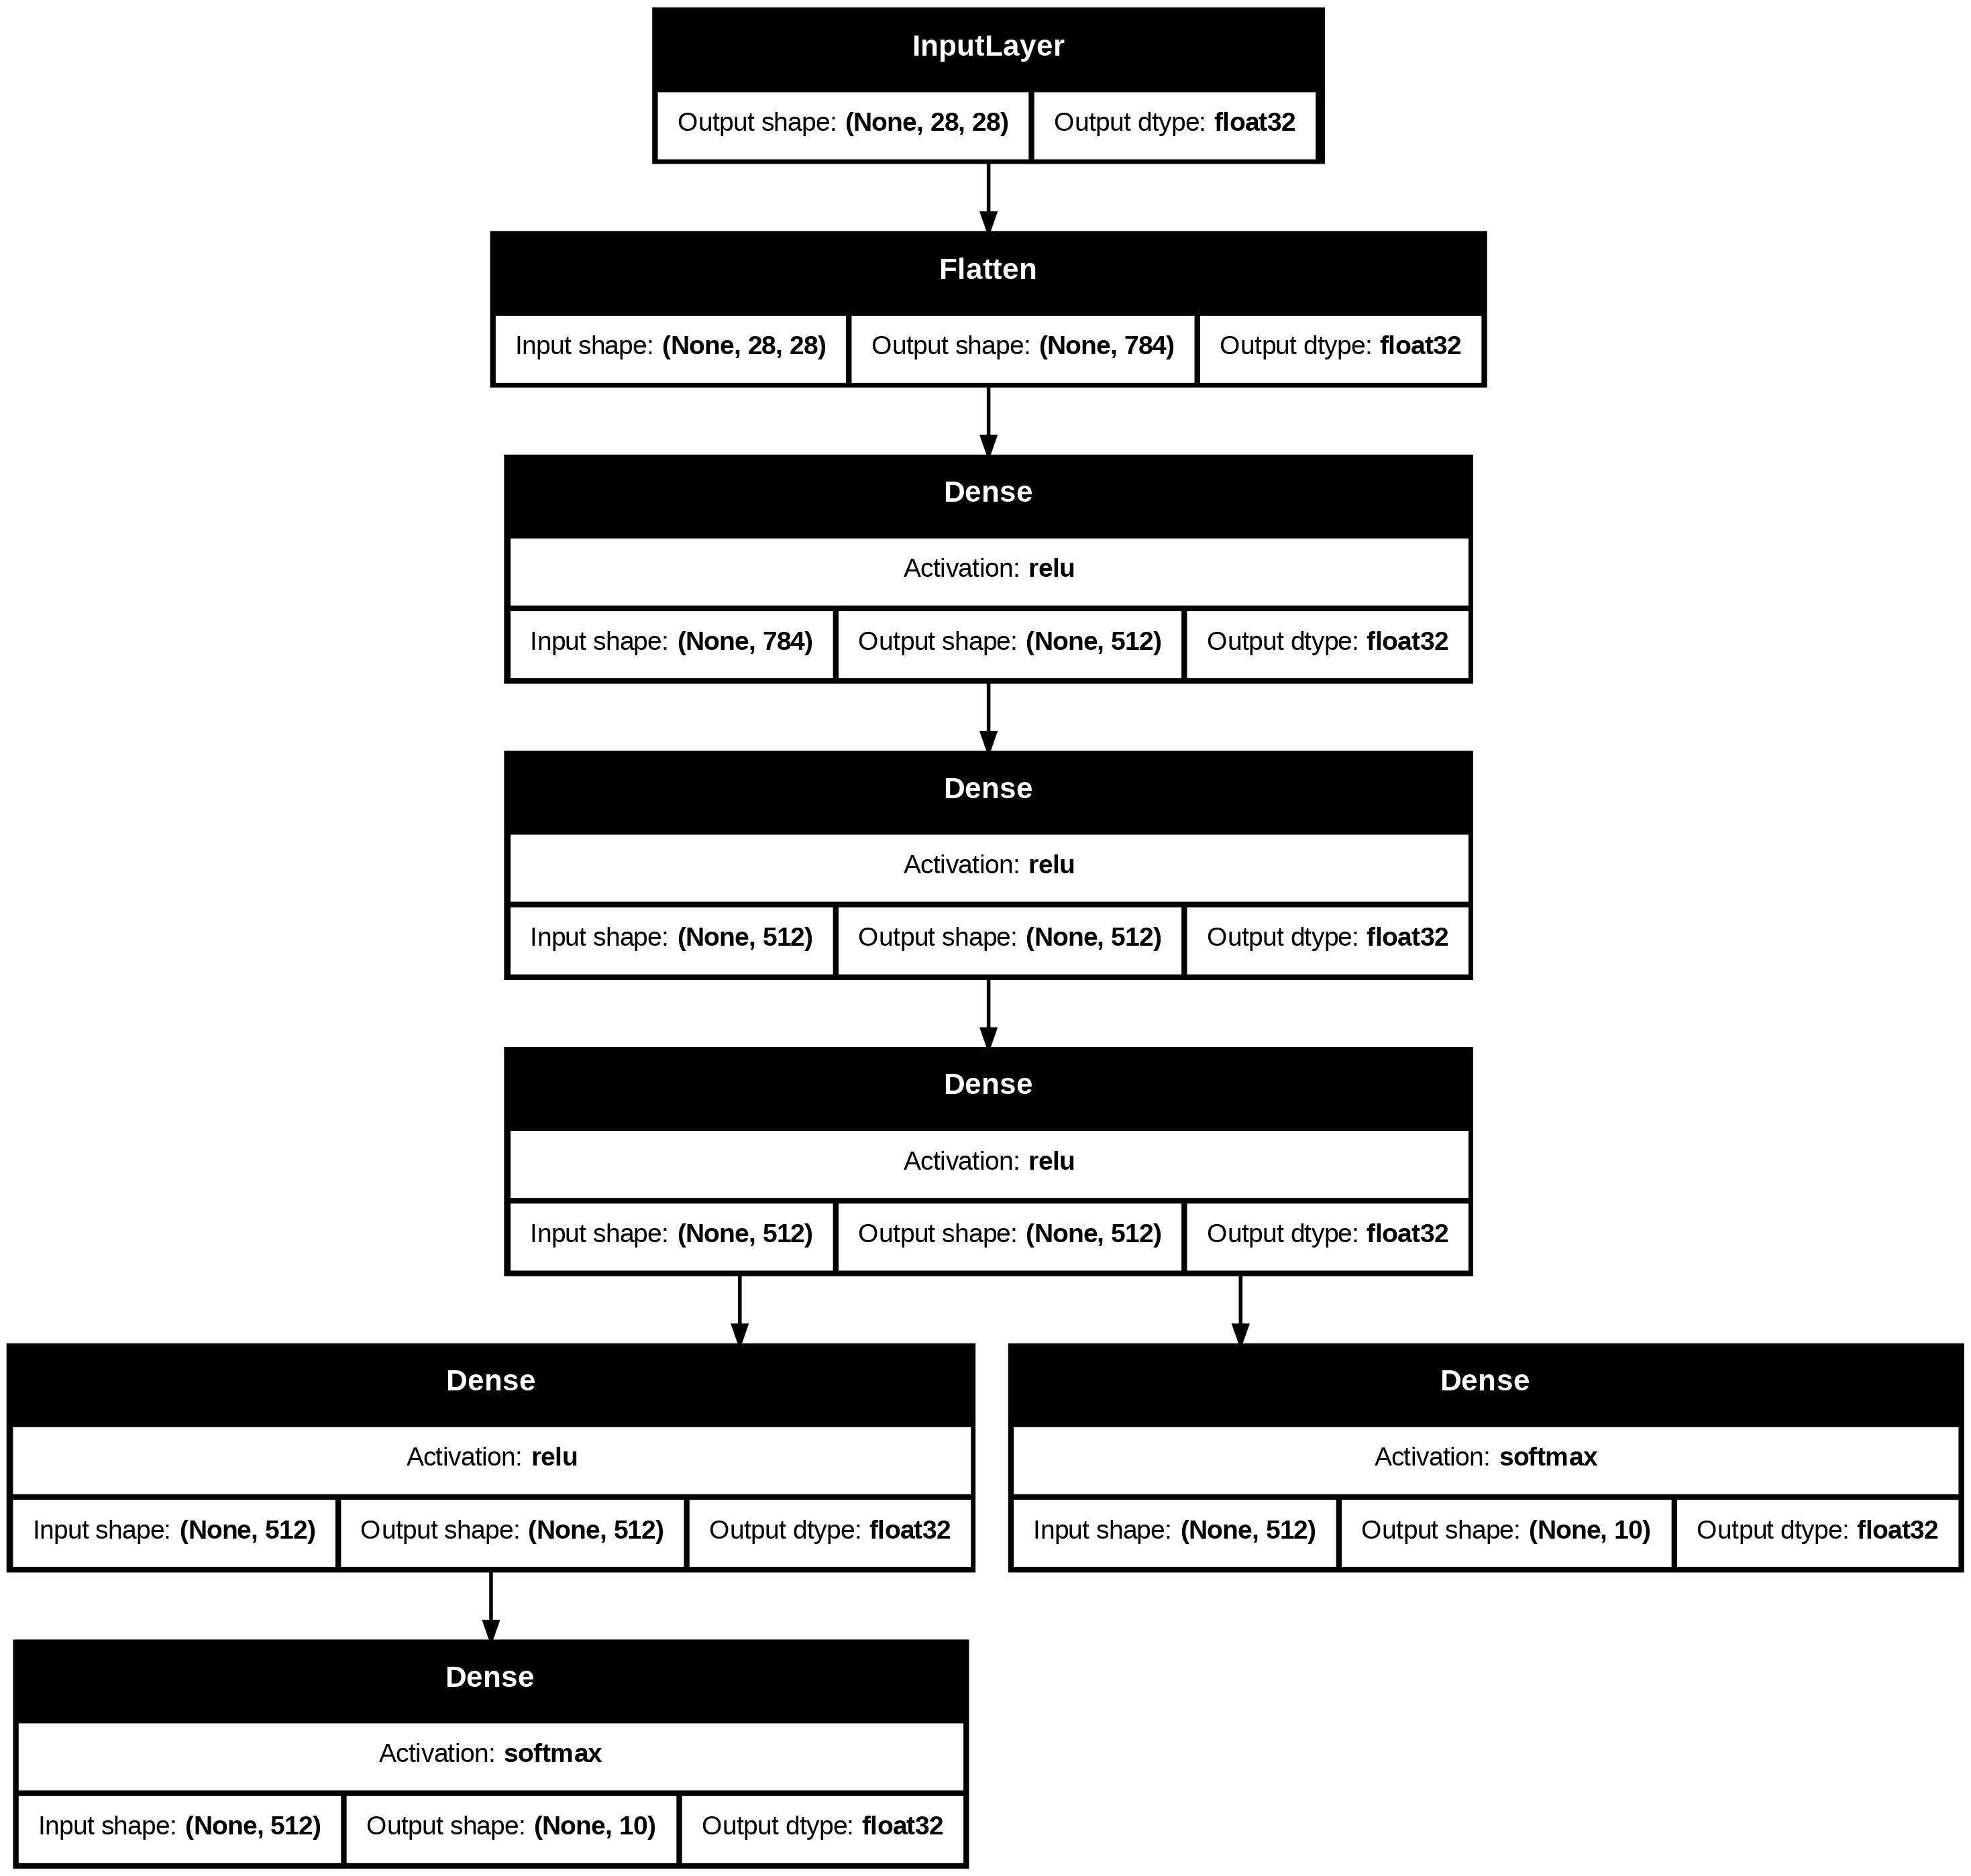

In [ ]:
keras.utils.plot_model(
                        functional_api_multi_outputs_model,
                        show_shapes=True,
                        show_dtype=True,
                        show_layer_activations=True
)

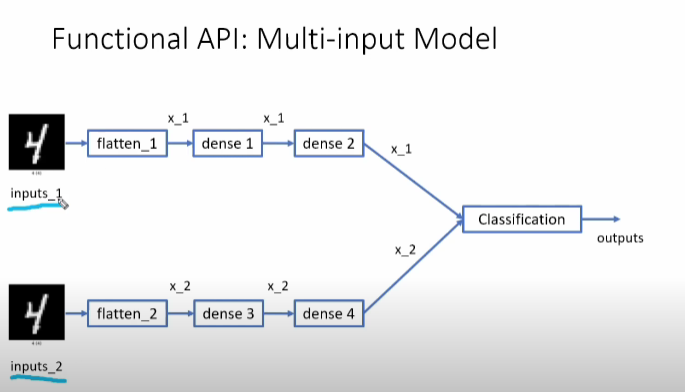

In [ ]:
inputs_1 = keras.Input(shape=(28, 28), name='input_1')
inputs_2 = keras.Input(shape=(28, 28), name='input_2')
x_1 = Flatten(name='flatten_1')(inputs_1)
x_1 = Dense(512, activation = 'relu', name='dense_1')(x_1)
x_1 = Dense(512, activation = 'relu', name='dense_2')(x_1)

x_2 = Flatten(name='flatten_2')(inputs_2)
x_2 = Dense(512, activation = 'relu', name='dense_3')(x_2)
x_2 = Dense(512, activation = 'relu', name='dense_4')(x_2)

outputs = Dense(10, activation='softmax', name='classification_2')(x_1 + x_2)

functional_api_multi_inputs_model = keras.Model(inputs = [inputs_1, inputs_2], outputs = outputs)
functional_api_multi_inputs_model.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_1 (InputLayer)      │ (None, 28, 28)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_2 (InputLayer)      │ (None, 28, 28)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 784)            │              0 │ input_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 784)            │              0 │ input_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 512)            │        401,920 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 512)            │        401,920 │ flatten_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 512)            │        262,656 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 512)            │        262,656 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_5 (Add)               │ (None, 512)            │              0 │ dense_2[0][0],         │
│                           │                        │                │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ classification_2 (Dense)  │ (None, 10)             │          5,130 │ add_5[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,334,282 (5.09 MB)

 Trainable params: 1,334,282 (5.09 MB)

 Non-trainable params: 0 (0.00 B)

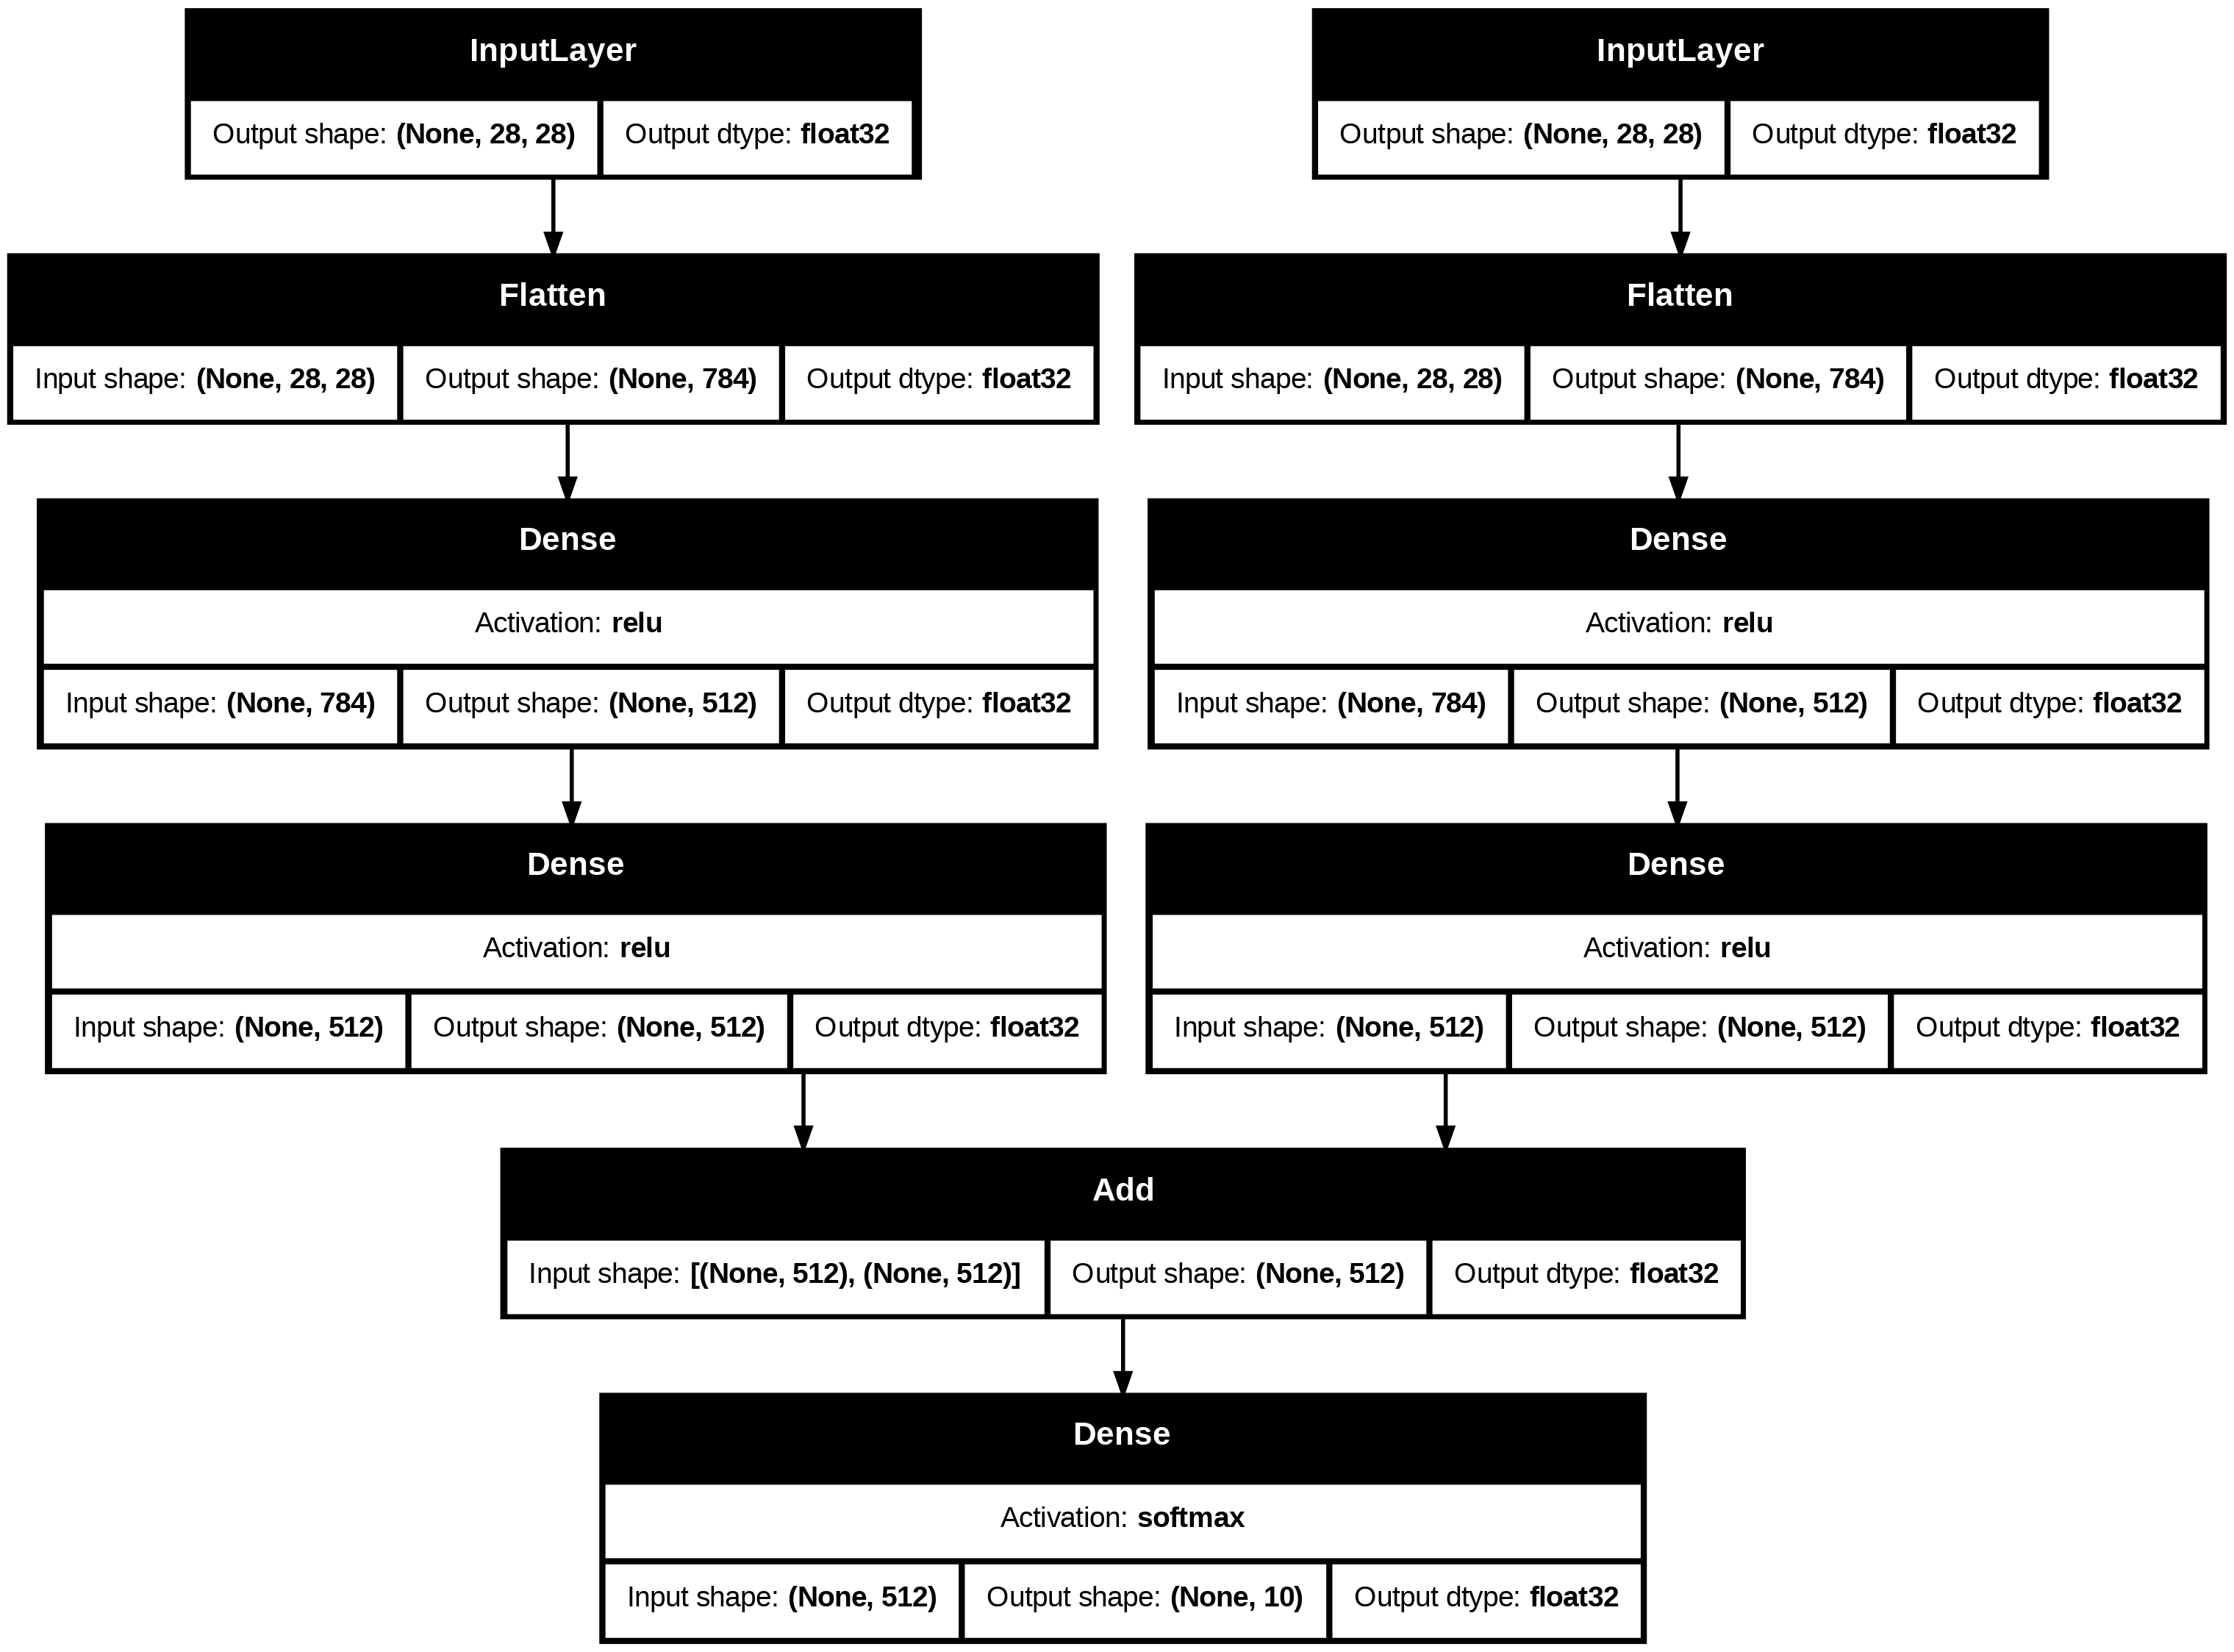

In [ ]:
keras.utils.plot_model(
                        functional_api_multi_inputs_model,
                        show_shapes=True,
                        show_dtype=True,
                        show_layer_activations=True
)

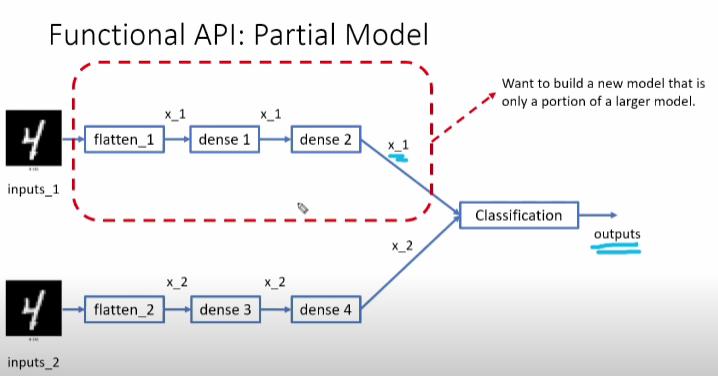

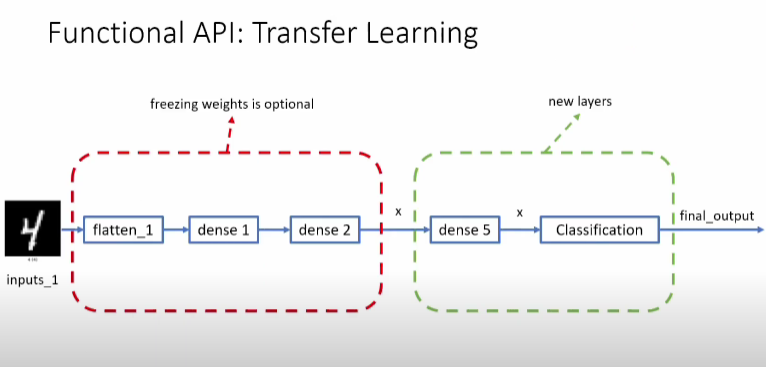

In [ ]:
# above partial model and transfer leraning can also be dont using functional api

3. ***Model subclassing***


In [ ]:
# Not needed now make sure add here later